# TRABAJO PRÁCTICO 1: Análisis Exploratorio de Datos

## Análisis realizado
- ### Generales
    - [Cantidad de registros en cada dataset dependiendo de la hora](#link_1)
    - [Instalaciones_clicks_subastas_eventos_por_dispositivo](#link_34)
- ### Clicks
    - [Posición clicks](#link_2)
    - [Cantidad de clicks por tiempo de click](#link_3)
    - [Publicidades con más clicks](#link_4)
    - [Ubicación geográfica de clicks](#link_5)
    - [Dispositivos con más clicks](#link_6)
- ### Installs
    - [Instalaciones atribuidas Jampp](#link_7)
    - [Tipos de instalaciones](#link_8)
    - [Horario instalaciones](#link_9)
    - [Instalaciones por aplicación](#link_10)
    - [Instalaciones wifi](#link_11)
    - [Instalaciones por IP](#link_12)
    - [Publicidades con más instalaciones](#link_13)
    - [Instalaciones por dispositivo](#link_14)
    - [Instalaciones debidas a publicaciones subastadas](#link_15)
    - [Instalaciones debidas a publicaciones subastadas atribuidas](#link_16)   
    - [Instalaciones y_tipos_eventos](#link_30)     
    - [Sitio_de_instalacion](#link_31)     
    - [Sitio_de_instalacion-Sistema_Operativo](#link_32)     
    - [Dias_pasados_ultima_instalacion](#link_33)     
- ### Auctions
    - [Cantidad subastas por dispositivo](#link_17)
    - [Subastas por hora](#link_18)
- ### Events
    - [Eventos por tipo de conexión](#link_19)
    - [Publicidades Google vs Apple](#link_20)
    - [Eventos por Version SO](#link_21)
    - [Horarios Eventos](#link_22)
    - [Atribuciones Jampp eventos](#link_23)
    - [Ciudades con mas Eventos](#link_24)
    - [Comparacion Ciudades mas eventos](#link_25)
    - [Eventos por dispositivo](#link_26)
    - [Dispositivo por ciudad](#link_27)
    - [S.O dispositivos](#link_28)    
    - [Eventos_previos_instalaciones](#link_29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.dates as md
import seaborn as sns
import datetime as datetime
import numpy as np

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Importamos los dataframes ya limpios utilizando los otros notebooks
#Los dataframes se van a llamar: clicks,auctions,installs y events
%run Limpieza_Clicks.ipynb
%run Limpieza_Auctions.ipynb
%run Limpieza_Installs.ipynb
%run Limpieza_Events.ipynb

Hacemos un head de los dataframes para echar un pequeño vistazo a la estructura de los mismos luego de la limpieza.

In [3]:
clicks.head()

,advertiser_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,os_minor,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash
0,2,4,2019-03-06 22:42:12.755,6333597102633388268,1.205689,1.070234,False,1,iGgClCM9exiHF4K31g94XmvHEBSLKIY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,-1,1.563,0.905,0.078,Google,1904083516767779093
1,0,0,2019-03-08 10:24:30.641,6333597102633388268,1.218924,1.071209,False,4,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,3.025219e+18,NaN,1.774085e+18,392184377613098015,-1,NaN,NaN,NaN,Google,3086509764961796666
2,0,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,5.975656e+18,NaN,3.072849e+18,392184377613098015,-1,NaN,0.946,0.473,Google,6958163894863846647
3,2,3,2019-03-06 03:08:51.543,6333597102633388268,1.205689,1.070234,False,45,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,6.768137e+18,NaN,3.072849e+18,2733035977666442898,-1,19.013,0.035,0.431,Google,4368617728156436525
4,2,3,2019-03-06 03:32:55.570,6333597102633388268,1.205689,1.070234,False,45,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,6.768137e+18,NaN,3.072849e+18,2733035977666442898,-1,28.110,0.054,0.423,Google,4368617728156436525


In [4]:
auctions.head()

,country,date,device_id,platform,ref_type_id,source_id
0,6333597102633388268,2019-03-11 14:18:33.290763,6059599345986491085,1,1,0
1,6333597102633388268,2019-03-11 14:18:34.440157,1115994996230693426,1,1,0
2,6333597102633388268,2019-03-11 14:18:35.862360,7463856250762200923,1,1,0
3,6333597102633388268,2019-03-11 14:18:36.167163,7829815350267792040,1,1,0
4,6333597102633388268,2019-03-11 14:18:37.728590,1448534231953777480,1,1,0


In [5]:
installs.head()

,created,application_id,ref_type,ref_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,ip_address,device_language,Wifi_cat
0,2019-03-13 01:43:33.445,0,Google,8464844987297247076,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,5529284367937637301,NaN,Sin Definir
1,2019-03-13 04:58:35.078,0,Google,3250564871270161533,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,6098022721363533304,NaN,Sin Definir
2,2019-03-13 04:20:57.666,0,Google,7953318831018100268,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,4636407223847323867,3.301378e+18,Sin Definir
3,2019-03-13 04:20:57.698,0,Google,7953318831018100268,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,4636407223847323867,NaN,Sin Definir
4,2019-03-10 22:24:56.684,0,Google,8355110941557237501,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,685400811232710215,3.301378e+18,Sin Definir


In [6]:
events.head()

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,session_user_agent,user_agent,event_uuid,carrier,kind,device_os,connection_type,ip_address,device_language,Wifi_cat
0,2019-03-05 00:09:36.966,0,Google,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,a9c0b263-acb2-4577-92c5-cbde5d7a5db1,2.248157e+17,5.516623e+18,7.531669e+18,Cable/DSL,7858558567428669000,4.077062e+17,Sin Definir
1,2019-03-05 00:09:38.920,1,Google,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,1cd98205-0d97-4ec2-a019-667997dbfe7a,2.248157e+17,9.977660e+17,7.531669e+18,Cable/DSL,7858558567428669000,4.077062e+17,Sin Definir
2,2019-03-05 00:09:26.195,0,Google,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,f02e2924-21ae-492b-b625-9021ae0a4eca,2.248157e+17,5.516623e+18,7.531669e+18,Cable/DSL,7858558567428669000,4.077062e+17,Sin Definir
3,2019-03-05 00:09:31.107,2,Google,2688759737656491380,38,False,6333597102633388268,5.908703e+17,NaN,5.990117e+18,...,7.164321e+18,NaN,a813cf45-a36e-4668-85e2-5395f1564e98,2.248157e+17,8.561153e+18,7.531669e+18,Cable/DSL,6324037615828123965,4.077062e+17,Sin Definir
4,2019-03-09 21:00:36.585,3,Google,2635154697734164782,38,False,6333597102633388268,7.391844e+18,NaN,5.960896e+18,...,7.164321e+18,NaN,63a4f0aa-e147-469f-8c55-4ca4f8d0e310,2.248157e+17,8.731902e+17,7.531669e+18,Cable/DSL,2894495631302821483,3.301378e+18,Sin Definir


## Exploracion De Datos

<a id='link_1'></a>
### Cantidad de registros en cada dataset dependiendo de la hora

In [7]:
clicks['created_time'] =clicks['created'].dt.time.map(lambda x: x.replace(second=0, microsecond = 0))
auctions['date_time'] =auctions['date'].dt.time.map(lambda x: x.replace(second=0, microsecond = 0))
events['date_time'] =events['date'].dt.time.map(lambda x: x.replace(second=0, microsecond = 0))
installs['created_time'] =installs['created'].dt.time.map(lambda x: x.replace(minute=0,second=0, microsecond = 0))

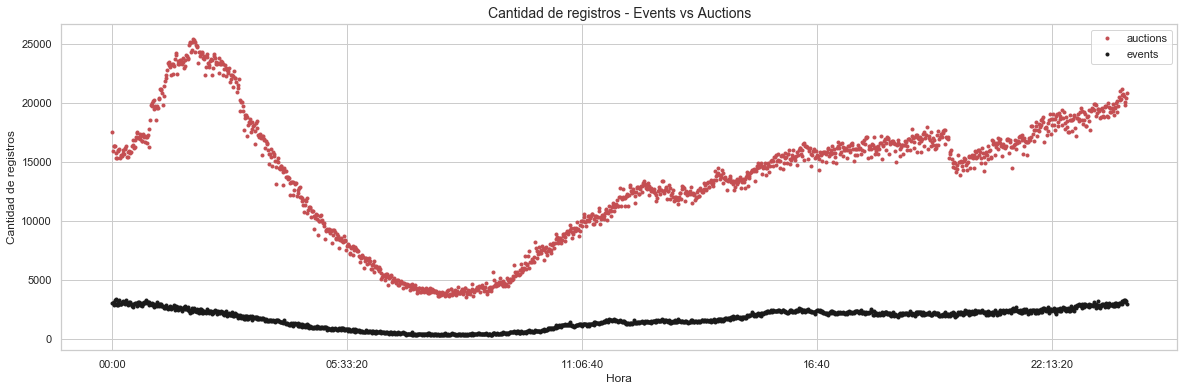

In [8]:
auctions_por_hora = pd.DataFrame(auctions['date_time'].value_counts())
auctions_por_hora.rename(columns={'date_time':'auctions'}, inplace=True)
auctions_por_hora.reset_index(inplace=True)

events_por_hora = pd.DataFrame(events['date_time'].value_counts())
events_por_hora.rename(columns={'date_time':'events'}, inplace=True)
events_por_hora.reset_index(inplace=True)

events_auctions_por_hora = pd.merge(auctions_por_hora,events_por_hora,how='outer',on='index').fillna(0).set_index('index')
ax = events_auctions_por_hora.plot(kind='line',figsize=(20,6), style = ['.r', '.k']);
ax.set_xlabel('Hora')
ax.set_ylabel('Cantidad de registros')
ax.set_title('Cantidad de registros - Events vs Auctions',fontsize=14);

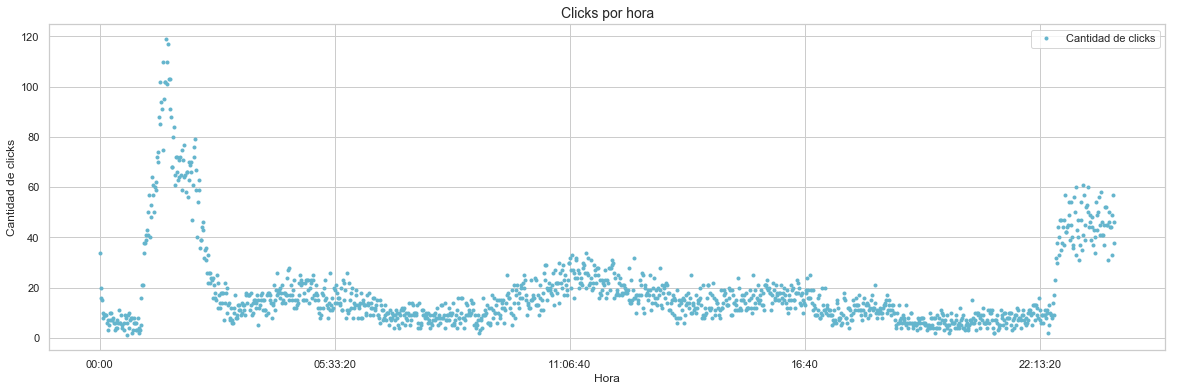

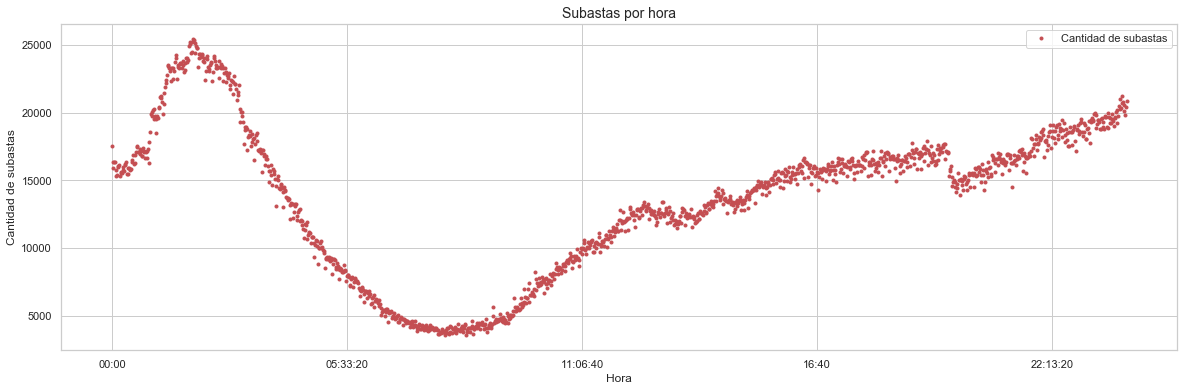

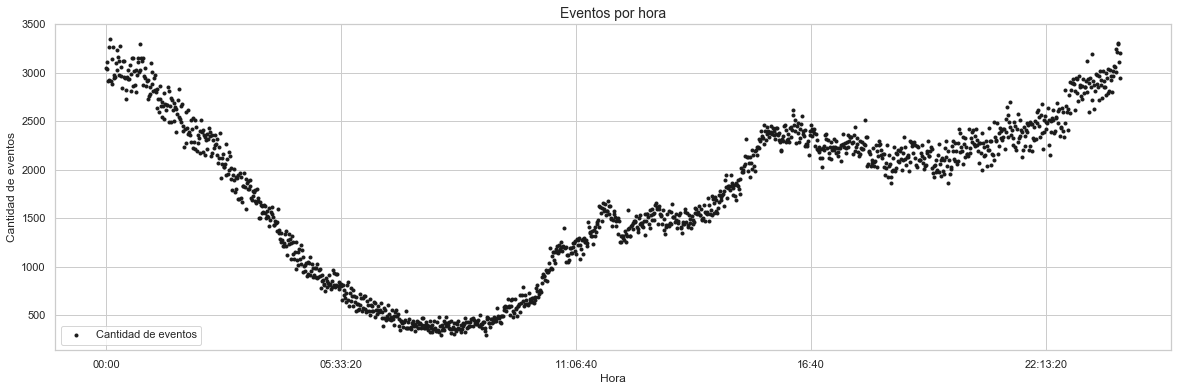

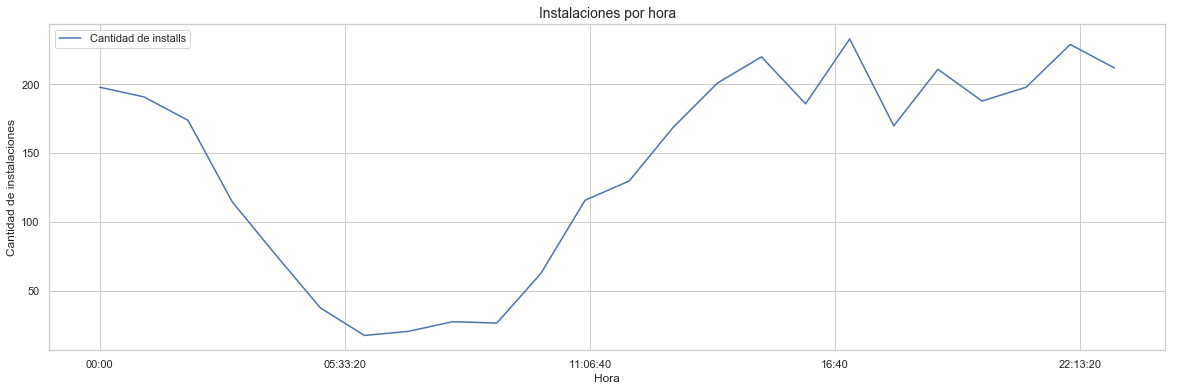

In [9]:
clicks_by_time = clicks.groupby('created_time').agg({'created_time':['count']})
clicks_by_time.columns = ['Cantidad de clicks']
clicks_by_time.index.name = 'Hora'
ax = clicks_by_time.plot(figsize=(20,6), style = '.c');
ax.set_xlabel('Hora')
ax.set_ylabel('Cantidad de clicks')
ax.set_title('Clicks por hora',fontsize=14);

auctions_by_time = auctions.groupby('date_time').agg({'date_time':['count']})
auctions_by_time.columns = ['Cantidad de subastas']
auctions_by_time.index.name = 'Hora'
ax = auctions_by_time.plot(figsize=(20,6), style = '.r');
ax.set_xlabel('Hora')
ax.set_ylabel('Cantidad de subastas')
ax.set_title('Subastas por hora',fontsize=14);

events_by_time = events.groupby('date_time').agg({'date_time':['count']})
events_by_time.columns = ['Cantidad de eventos']
events_by_time.index.name = 'Hora'
ax = events_by_time.plot(figsize=(20,6), style = '.k');
ax.set_xlabel('Hora')
ax.set_ylabel('Cantidad de eventos')
ax.set_title('Eventos por hora',fontsize=14);

installs_by_time = installs.groupby('created_time').agg({'created_time':['count']})
installs_by_time.columns = ['Cantidad de installs']
installs_by_time.index.name = 'Hora'
ax = installs_by_time.plot(kind='line',figsize=(20,6));
ax.set_xlabel('Hora')
ax.set_ylabel('Cantidad de instalaciones')
ax.set_title('Instalaciones por hora',fontsize=14);

   Podemos observar que la cantidad de clicks aumenta durante la noche alcanzando el pico entre la 1 y 2 de mañana con alrededor de 100 clicks registrados, mientras que durante el resto del día no llega a alcanzar los 40. Alguna conclusión? Como que durante la noche la gente está mas libre y tiende a usar mas las aplicaciones del celular y por ende le salen más publicidades?
   
   La cantidad de subastas se relaciona bastante en el mismo rango horario superando las 25000 subastas. Lo cual tiene sentido porque deberiamos apostar mas al momento en el que el usuario es mas activo.
   
   Podemos ver un comportamiento similar en el analisis de eventos por hora. A partir de la medianoche es cuando mas eventos se registran, afirmando mas aun lo que vimos en el primer grafico.
   
   Las instalaciones, en cambio, se producen de manera pareja a lo largo del dia. No tanto durante la noche.
   



## Clicks

<a id='link_2'></a>
### En que lugar de la pantalla se realizan la mayor cantidad de clicks

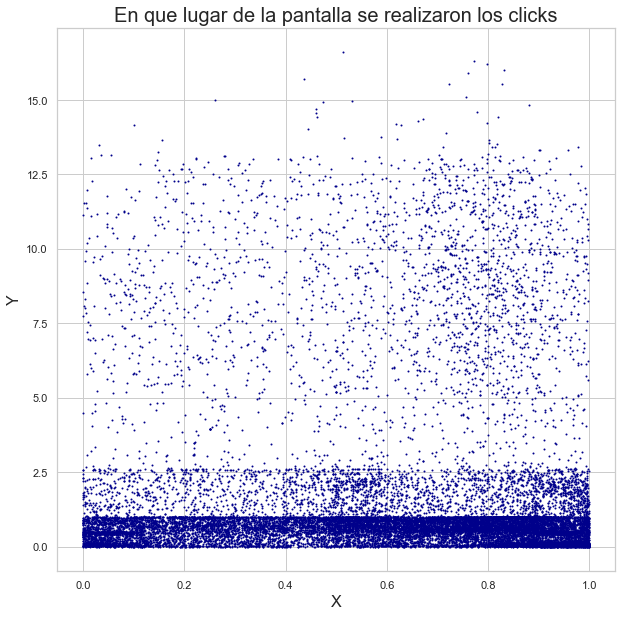

In [6]:
g = clicks.plot.scatter('touchX','touchY',s=1,c='DarkBlue', figsize=(10,10));
g.set_xlabel("X", fontsize=16);
g.set_ylabel("Y", fontsize=16);
g.set_title('En que lugar de la pantalla se realizaron los clicks', fontsize=20);

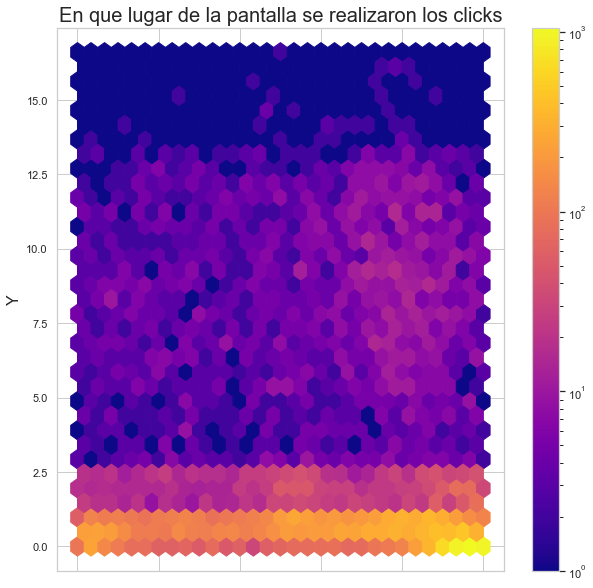

In [10]:
g = clicks.plot.hexbin('touchX','touchY', gridsize=30, figsize=(10,10),cmap="plasma",bins='log');
g.set_xlabel("X", fontsize=16);
g.set_ylabel("Y", fontsize=16);
g.set_title('En que lugar de la pantalla se realizaron los clicks', fontsize=20);

<a id='link_3'></a>
### Cantidad de clicks en función del tiempo que tardan en realizar el click

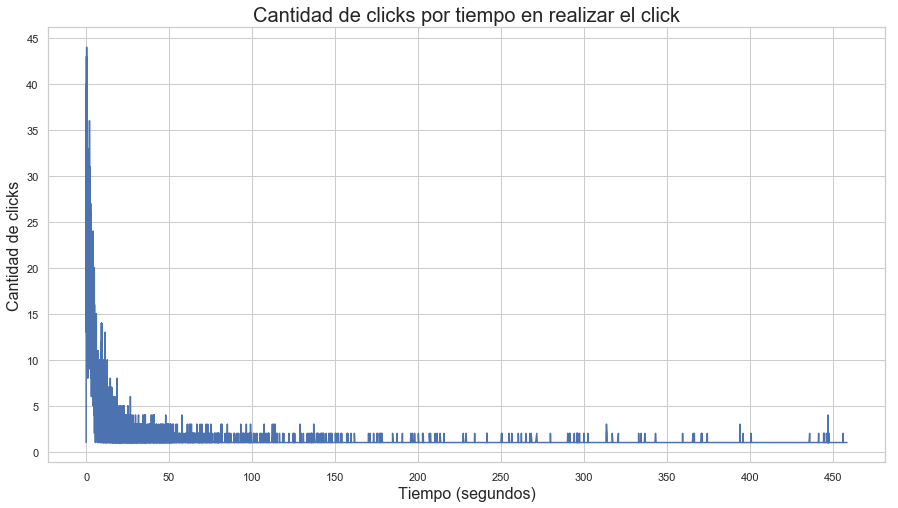

In [12]:
clicks['timeToClick'].round(2).value_counts().sort_index().head(7600).plot(kind ='line', figsize=(15,8));
plt.xticks([50 * i for i in range(10)]);
plt.yticks([5*i for i in range(10)]);
plt.title("Cantidad de clicks por tiempo en realizar el click", size=20);
plt.xlabel("Tiempo (segundos)", fontsize=16);
plt.ylabel("Cantidad de clicks", fontsize=16);

<a id='link_4'></a>
### Clients de Jampp con más clicks

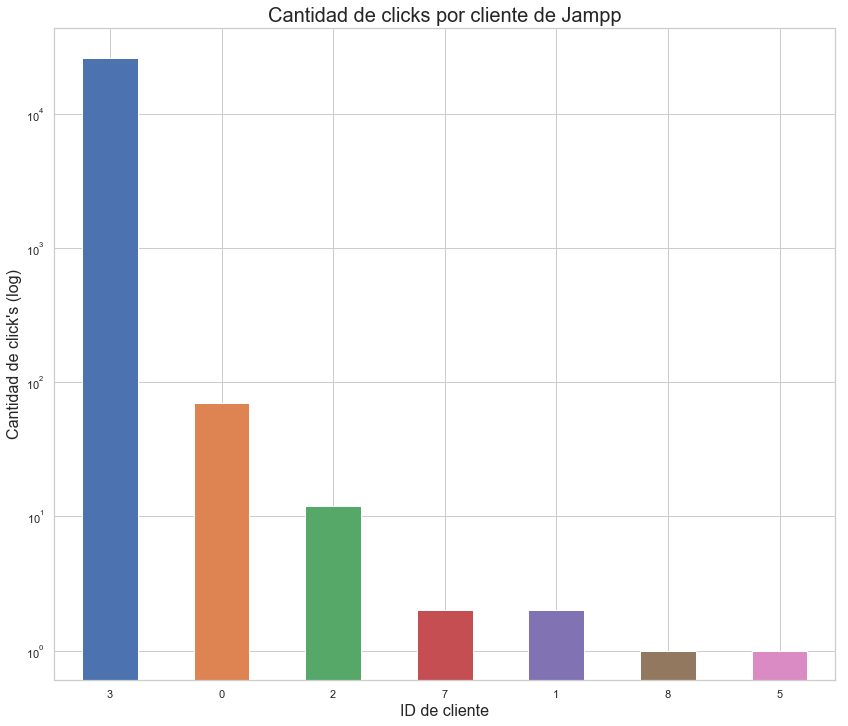

In [15]:
clicks['advertiser_id'].value_counts().plot(figsize=(14,12),kind='bar',rot=0,logy=True);

plt.title('Cantidad de clicks por cliente de Jampp', size=20)
plt.xlabel('ID de cliente', fontsize=16)
plt.ylabel('Cantidad de click\'s (log)', fontsize=16);

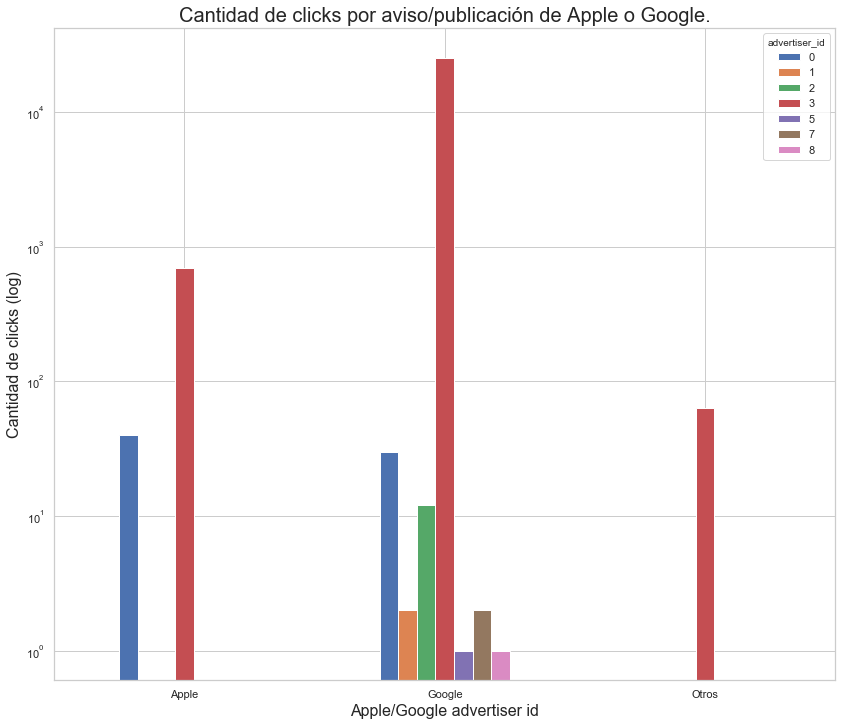

In [16]:
df =clicks.groupby(['ref_type','advertiser_id']).size().reset_index(name='cantidad')\
    .set_index(['ref_type','advertiser_id']).unstack()

df.columns = df.columns.droplevel()
df.fillna(value=0,inplace=True)
df.plot(figsize=(14,12),kind='bar',rot=0,logy=True);

plt.title('Cantidad de clicks por aviso/publicación de Apple o Google.', size=20)
plt.xlabel('Apple/Google advertiser id', fontsize=16)
plt.ylabel('Cantidad de clicks (log)', fontsize=16);

<a id='link_5'></a>
### Ubicacion geografica de clicks

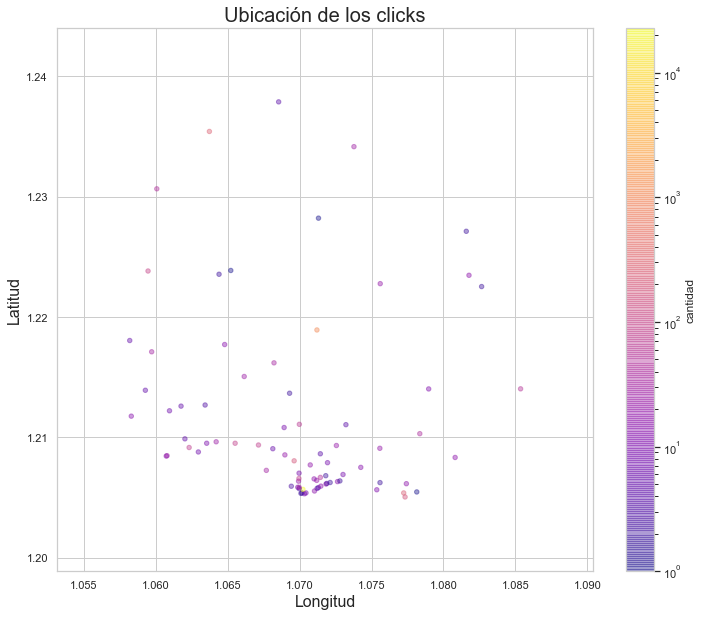

In [13]:
fig,ax1=plt.subplots()
lat_long_count = clicks.groupby(['latitude','longitude']).agg({"ref_hash":["count"]})
lat_long_count.columns = ['cantidad']
g = lat_long_count.reset_index().plot.scatter(figsize=(12,10),
                                              x="longitude",y="latitude", c='cantidad',
                                              norm=clr.LogNorm(), cmap='plasma', alpha=0.4,ax=ax1)
g.set_title('Ubicación de los clicks', fontsize=20)
g.set_xlabel('Longitud', fontsize=16)
g.set_ylabel('Latitud', fontsize=16);

Como sabemos, se realizó una transformación lineal sobre los valores de la latitud y la longitud, por lo tanto resulta imposible ubicarlos sobre un mapa.

<a id='link_6'></a>
### Dispositivos con más clicks

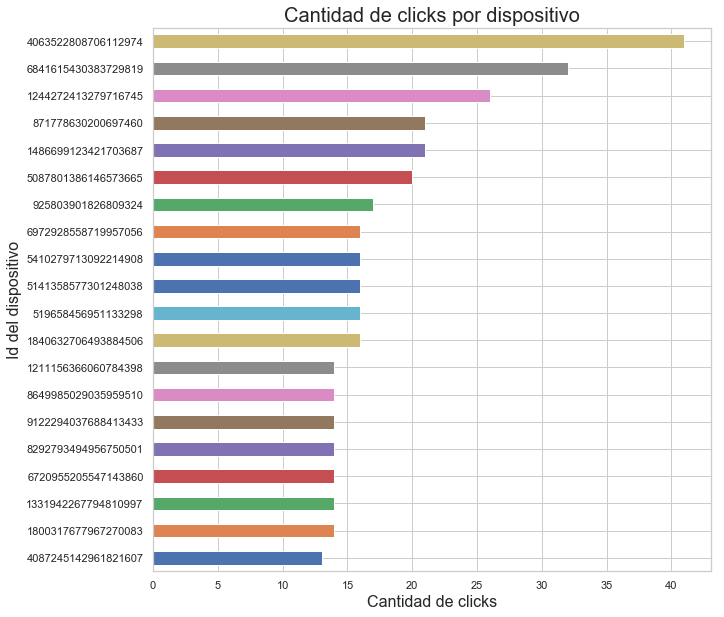

In [14]:
#### clicks['ref_hash'].value_counts().sort_values(ascending=False).head(20).T\
    .sort_values(ascending=True)\
    .plot(figsize=(10,10),kind='barh',rot=0);

plt.ylabel('Id del dispositivo', fontsize=16)
plt.title('Cantidad de clicks por dispositivo',fontsize=20)
plt.xlabel('Cantidad de clicks', fontsize=16);

## Installs

<a id='link_7'></a>
### Que instalaciones se registran gracias a Jampp

In [46]:
installs['attributed'].value_counts()

False    3412
Name: attributed, dtype: int64

In [47]:
installs.shape

(3412, 16)

El set de datos dado, no contiene instalaciones que Jampp se las atribuya.

<a id='link_8'></a>
### Tipos de instalaciones

In [48]:
installs['kind'].fillna(value='without_kind',inplace=True)

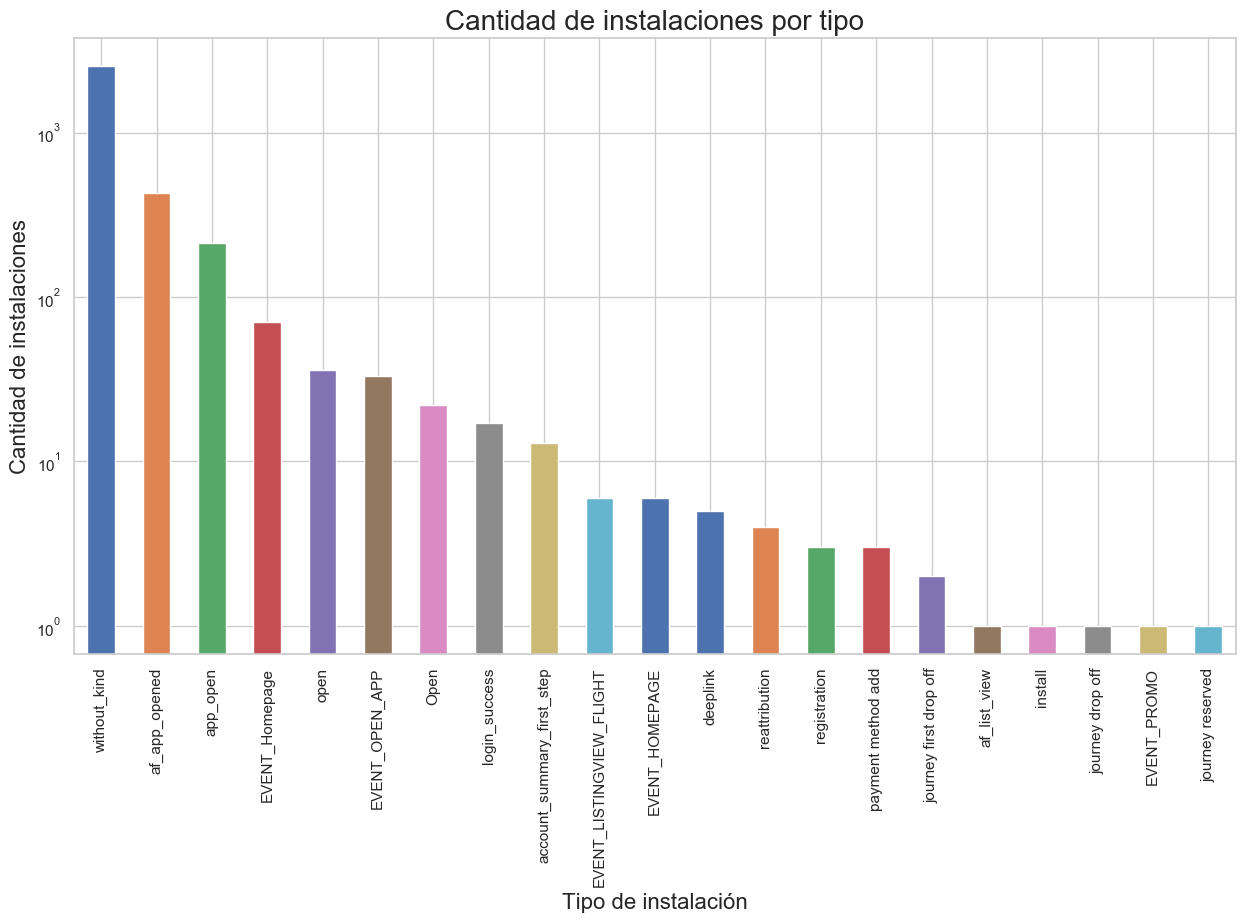

In [57]:
g=installs.groupby('kind').size().sort_values(ascending=False).plot(figsize=(15,8),kind='bar',rot=90, logy=True);

g.set_title('Cantidad de instalaciones por tipo',fontsize=20)
g.set_xlabel('Tipo de instalación', fontsize=16);
g.set_ylabel('Cantidad de instalaciones', fontsize=16);

<a id='link_9'></a>
### Horario de las instalaciones

In [26]:
installs['Week_day'] = installs['created'].dt.day_name().astype('category')
installs['Year'] = installs['created'].dt.year.astype('category')
installs['Month'] = installs['created'].dt.month.astype('category')
installs['Hour'] = installs['created'].dt.hour.astype('int8')

In [27]:
installs['Year'].value_counts()

2019    3412
Name: Year, dtype: int64

En el set de datos dado solo se tiene información del 2019.

In [28]:
installs['Month'].value_counts()

3    3412
Name: Month, dtype: int64

En el set de datos dado solo se tiene información del mes de Marzo.

In [29]:
df = installs[['Week_day','Hour']].groupby(['Week_day','Hour']).size().reset_index(name='cantidad').set_index('Week_day')

df = df.pivot_table(values='cantidad', index=df.index, columns='Hour').fillna(value=0).astype('int8')

In [30]:
df.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Week_day,,,,,,,,,,,,,,,,,,,,,
Friday,33,14,12,13,6,3,2,3,4,2,...,20,20,21,21,20,23,18,22,23,26
Monday,17,28,28,9,15,3,1,0,2,3,...,17,32,15,25,22,14,24,28,34,18
Saturday,17,25,19,14,10,5,5,4,4,2,...,15,26,16,28,24,26,20,20,18,20
Sunday,23,18,26,12,3,4,4,2,5,0,...,29,17,25,23,20,24,25,15,26,14
Thursday,24,20,16,16,8,5,1,1,2,7,...,20,29,19,35,13,34,16,21,24,15


Ordenamos por día de la semana

In [31]:
days = {'Week_day': ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]}
days = pd.DataFrame(data=days)
df = pd.merge(days, df, on='Week_day', how='left')
df = df.set_index('Week_day')

In [32]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Week_day,,,,,,,,,,,,,,,,,,,,,
Monday,17,28,28,9,15,3,1,0,2,3,...,17,32,15,25,22,14,24,28,34,18
Tuesday,42,42,38,22,13,9,5,8,7,7,...,58,46,54,49,39,55,42,43,56,62
Wednesday,42,44,35,29,21,9,0,3,4,6,...,42,50,36,52,32,35,43,49,48,57
Thursday,24,20,16,16,8,5,1,1,2,7,...,20,29,19,35,13,34,16,21,24,15
Friday,33,14,12,13,6,3,2,3,4,2,...,20,20,21,21,20,23,18,22,23,26


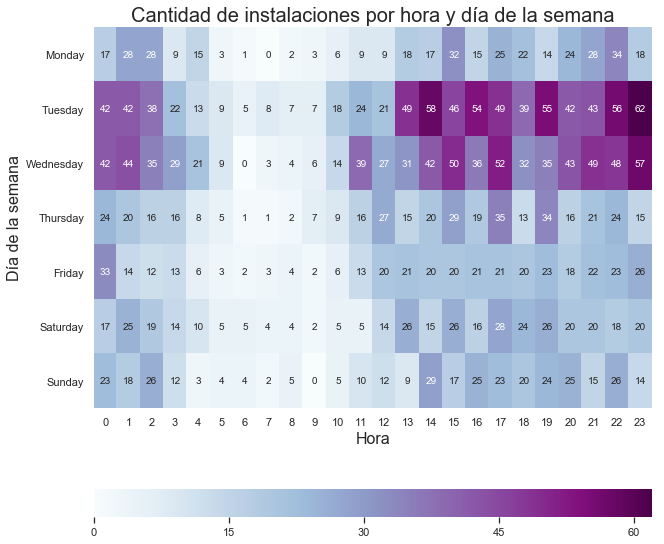

In [33]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df,ax=ax,cmap="BuPu",cbar_kws={"orientation": "horizontal"},annot=True);
plt.yticks(rotation=0);

plt.xlabel('Hora', fontsize=16);
plt.ylabel('Día de la semana', fontsize=16);
plt.title('Cantidad de instalaciones por hora y día de la semana', fontsize=20);

Podemos observar que suele haber mayor cantidad de instalaciones los días martes y miércoles en comparación con el resto de la semana.

In [87]:
del installs['Year']
del installs['Month']

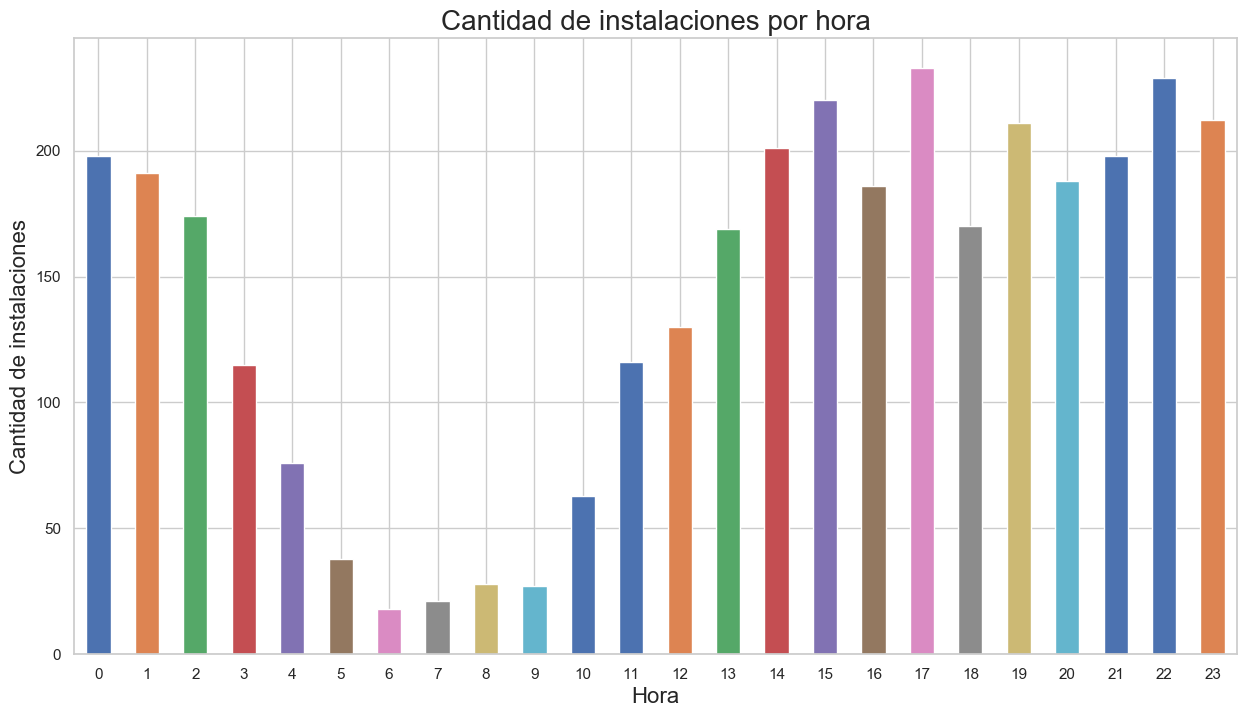

In [88]:
g = installs['Hour'].value_counts().sort_index().plot(figsize=(15,8),kind='bar',rot=0)

g.set_title('Cantidad de instalaciones por hora', fontsize=20);
g.set_xlabel('Hora', fontsize=16);
g.set_ylabel('Cantidad de instalaciones', fontsize=16);

A pesar de que el gráfico de cantidad de clicks por hora mostraba una gran diferencia entre la noche y el resto del día, observamos que la cantidad de instalaciones está más distribuída a lo largo del día a excepción del amanecer.

<a id='link_10'></a>
### Instalaciones por aplicación

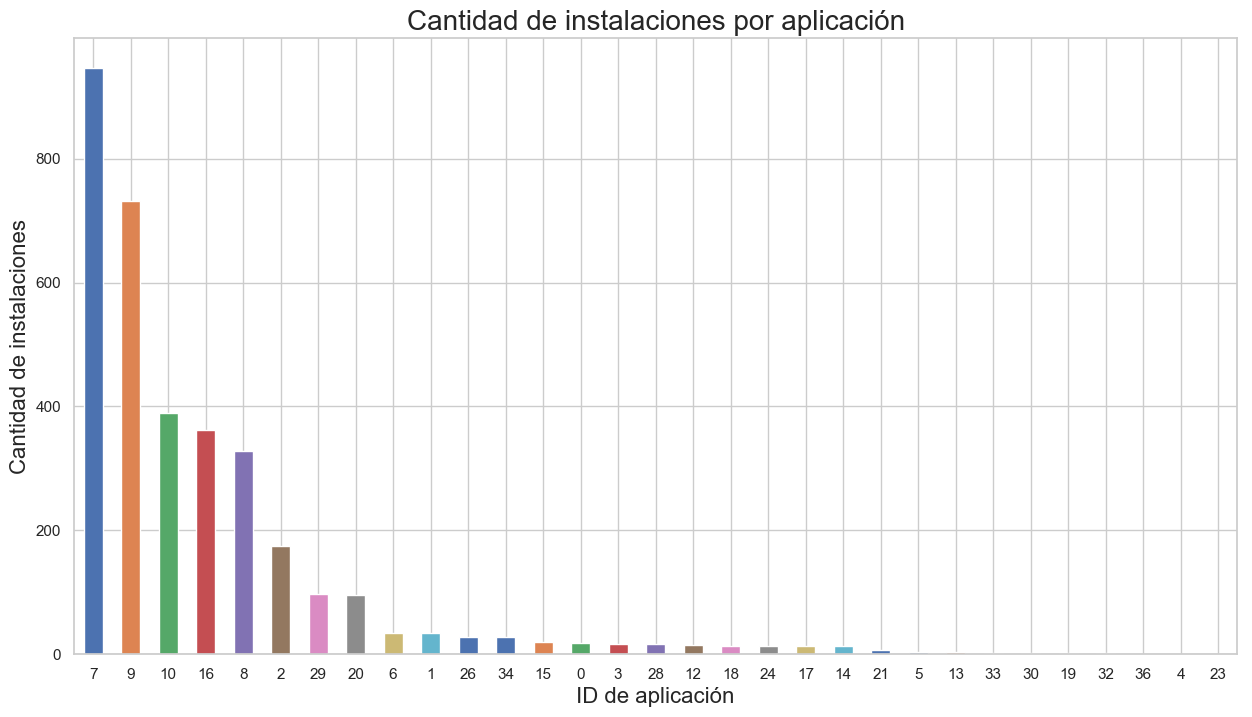

In [22]:
g = installs['application_id'].value_counts().plot(figsize=(15,8),kind='bar',rot=0)

g.set_title('Cantidad de instalaciones por aplicación', fontsize=20);
g.set_xlabel('ID de aplicación', fontsize=16);
g.set_ylabel('Cantidad de instalaciones', fontsize=16);

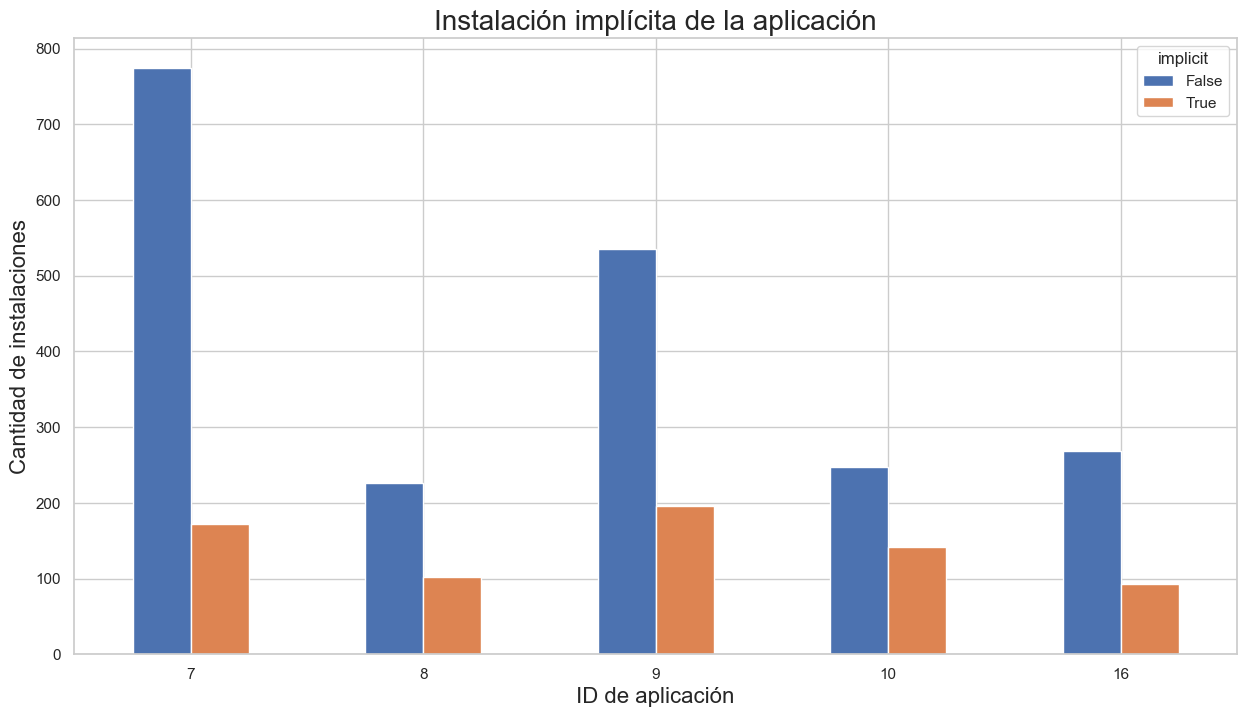

In [23]:
df = installs.loc[installs['application_id'].isin(installs['application_id'].value_counts().head(5).index)].\
    groupby(['application_id','implicit']).size().reset_index(name='cantidad').set_index('application_id')

df= df.pivot_table(values='cantidad', index=df.index, columns='implicit')

df.plot(figsize=(15,8),kind='bar',rot=0)

plt.title('Instalación implícita de la aplicación',size=20)
plt.xlabel('ID de aplicación',size=16)
plt.ylabel('Cantidad de instalaciones',size=16);

<a id='link_11'></a>
### Instalaciones wifi

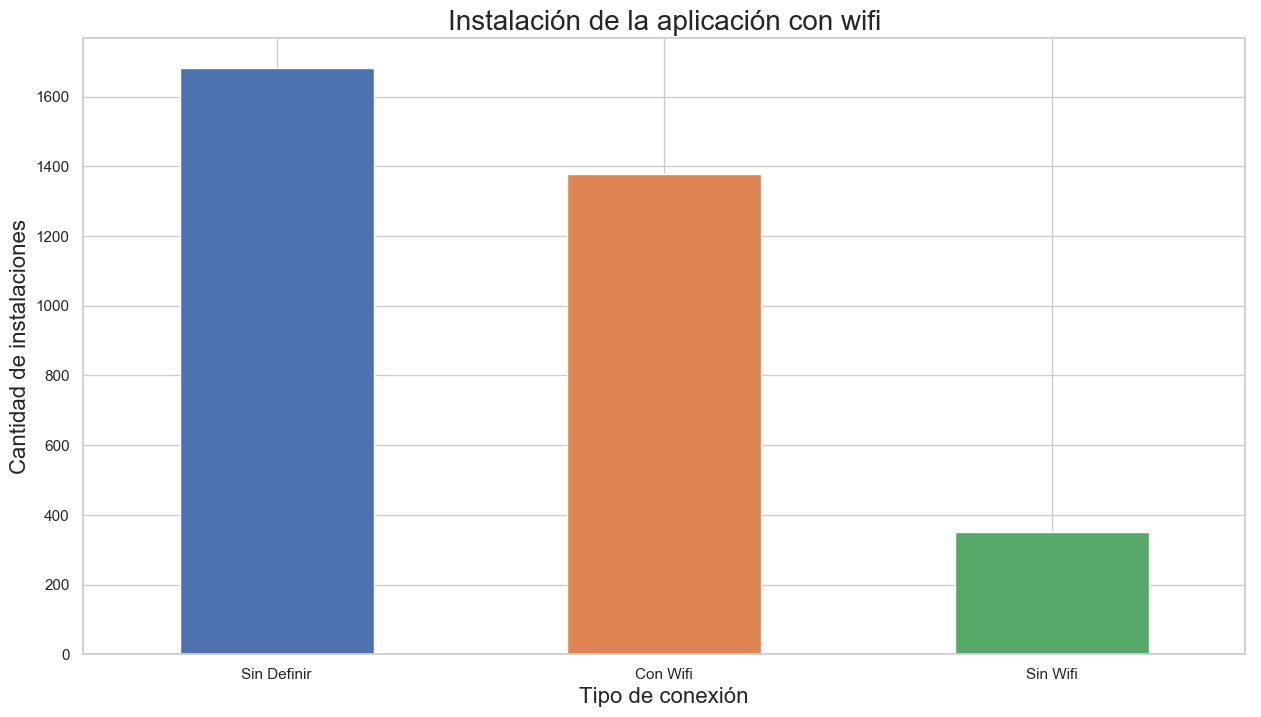

In [24]:
installs['Wifi_cat'].value_counts().plot(figsize=(15,8),kind='bar',rot=0)

plt.title('Instalación de la aplicación con wifi', size=20)
plt.xlabel('Tipo de conexión', size=16);
plt.ylabel('Cantidad de instalaciones', size=16);

<a id='link_12'></a>
### Cantidad de instalaciones por ip

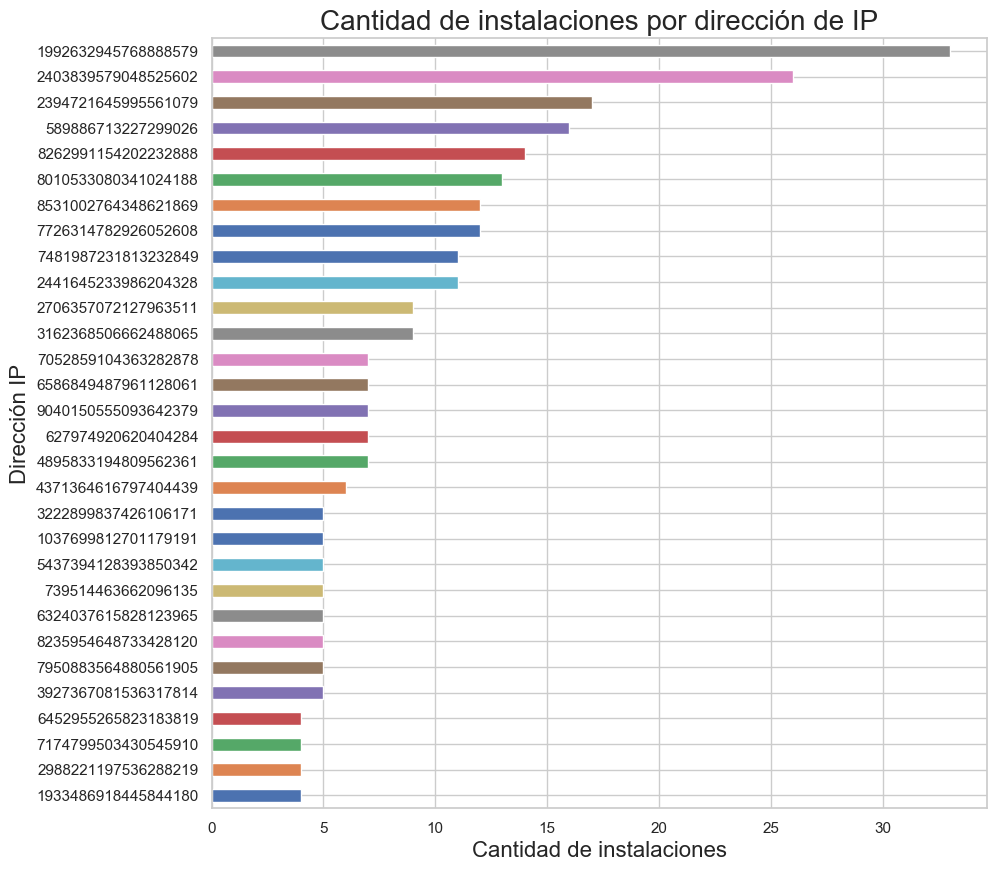

In [105]:
installs['ip_address'].value_counts().head(30).sort_values().plot(figsize=(10,10),kind='barh',rot=0);

plt.title('Cantidad de instalaciones por dirección de IP', size=20)
plt.xlabel('Cantidad de instalaciones', size=16)
plt.ylabel('Dirección IP', size=16);

<a id='link_13'></a>
### Publicidades con más instalaciones

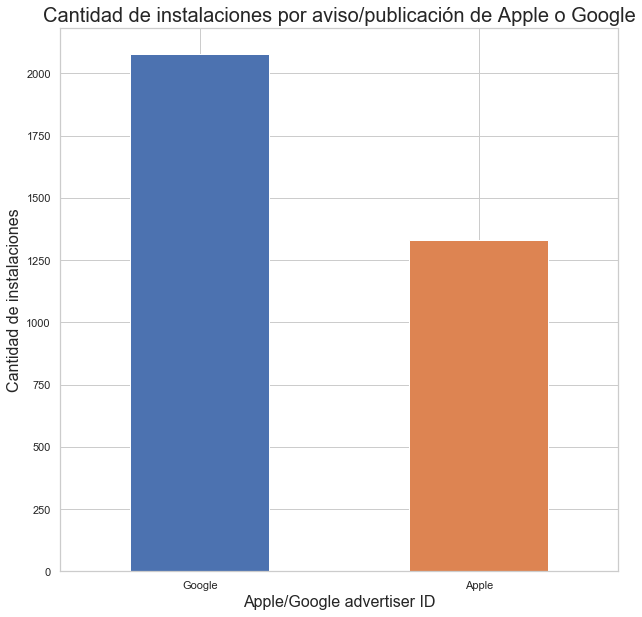

In [20]:
installs['ref_type'].value_counts().plot(figsize=(10,10),kind='bar',rot=0)

plt.title('Cantidad de instalaciones por aviso/publicación de Apple o Google', size=20)
plt.xlabel('Apple/Google advertiser ID', size=16)
plt.ylabel('Cantidad de instalaciones', size=16);

<a id='link_14'></a>
### Instalaciones por dispositivos

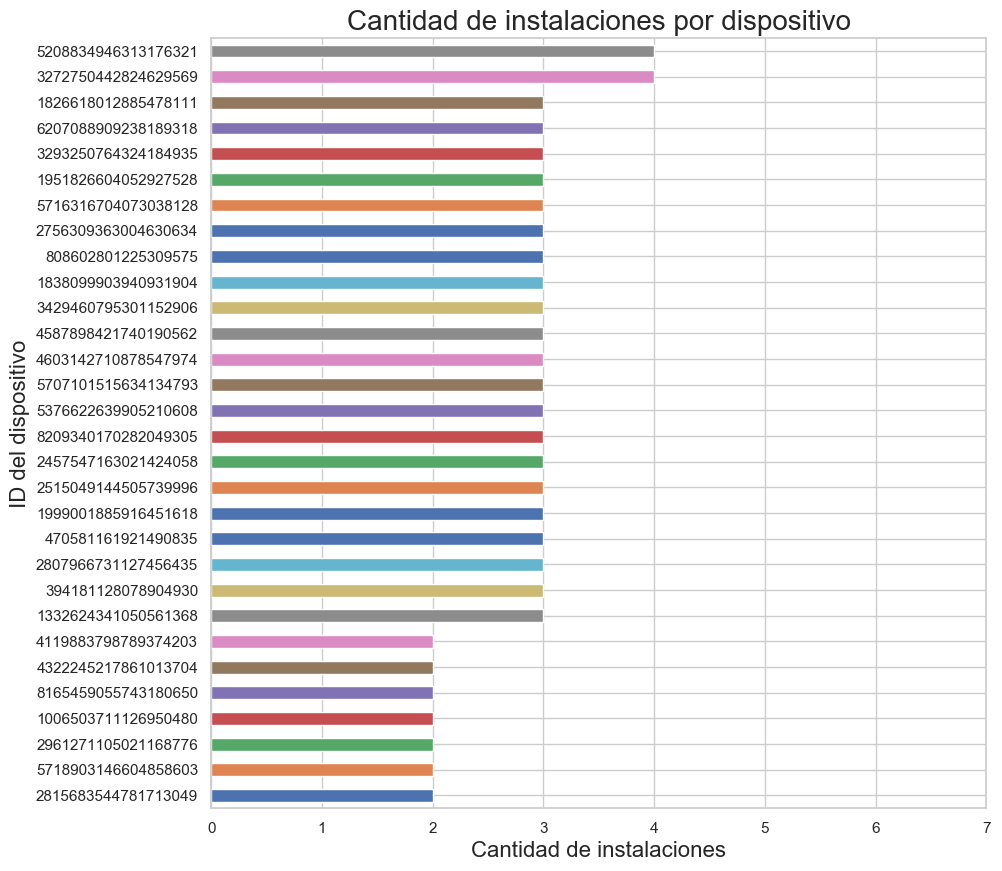

In [111]:
installs['ref_hash'].value_counts().sort_values(ascending=False).head(30).sort_values(ascending=True)\
    .plot(figsize=(10,10),kind='barh',rot=0);

r = [i for i in range(8)]
plt.ylabel('ID del dispositivo',fontsize=16)
plt.xlabel('Cantidad de instalaciones',fontsize=16)
plt.title('Cantidad de instalaciones por dispositivo',fontsize=20)
plt.xticks(r);

<a id='link_15'></a>
### Instalaciones que se debieron a publicaciones subastadas

In [16]:
installs['auctioned_ad'] = np.where(installs['ref_hash'].isin(auctions['device_id']),True,False)

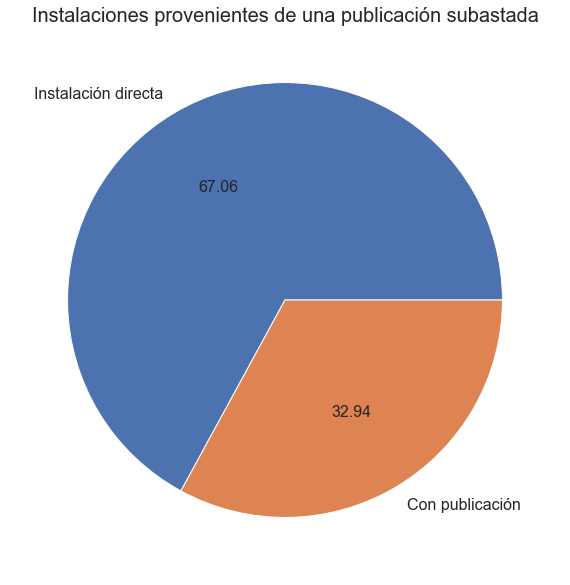

In [21]:
installs['auctioned_ad'].value_counts().plot.pie(labels=['Instalación directa',\
                                                        'Con publicación'],\
                                                figsize=(10, 10),\
                                                autopct='%.2f', fontsize=16)
plt.ylabel('');
plt.title('Instalaciones provenientes de una publicación subastada',fontsize=20);

<a id='link_16'></a>
### Instalaciones debido a una publicación subastada fueron atribuidas a Jampp

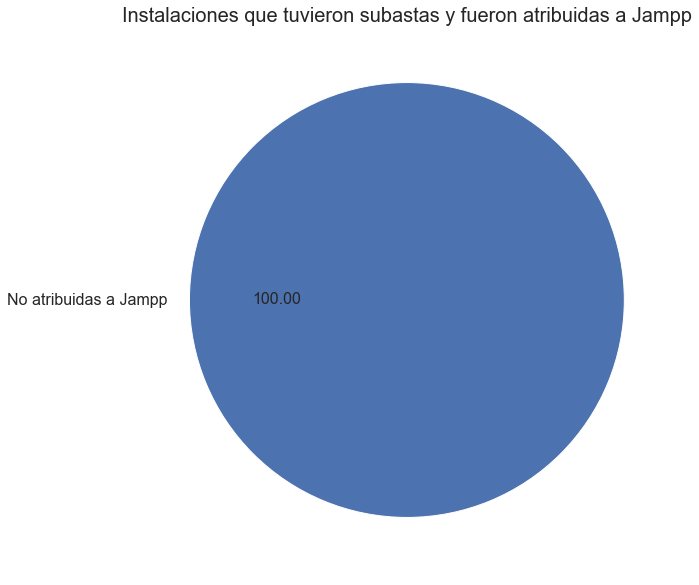

In [22]:
(installs.loc[installs['auctioned_ad']==True])['attributed'].value_counts()\
    .plot.pie(labels=['No atribuidas a Jampp',\
    'Atribuidas a Jampp'],figsize=(10, 10),\
    autopct='%.2f', fontsize=16)
plt.ylabel('');
plt.title('Instalaciones que tuvieron subastas y fueron atribuidas a Jampp',fontsize=20);

REVISAR: Me parece innecesario el gráfico ya que previamente habiamos visto que toda la columna "attributed" era False.

## Auctions

<a id='link_17'></a>
### En que dispositivos se realiza la mayor cantidad de subastas

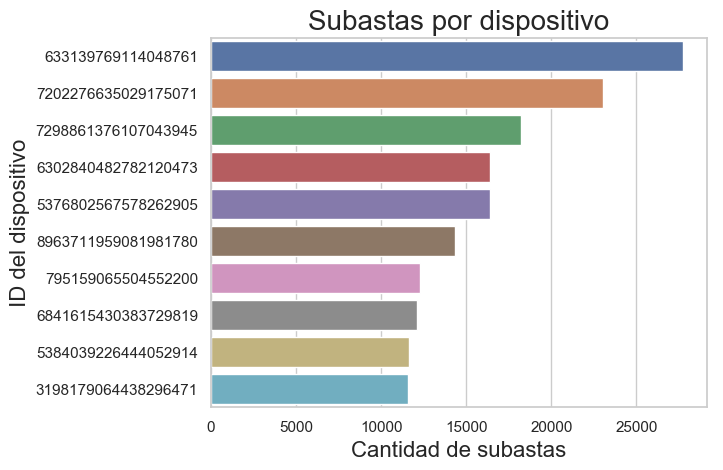

In [28]:
g = sns.barplot(x=auctions['device_id'].value_counts().head(10).values, 
                y=auctions['device_id'].value_counts().head(10).index, 
                order=auctions['device_id'].value_counts().head(10).index,orient='h')
g.set_title("Subastas por dispositivo", fontsize=20)
g.set_xlabel("Cantidad de subastas", fontsize=16)
g.set_ylabel("ID del dispositivo", fontsize=16);

<a id='link_18'></a>
### Cantidad de subastas realizadas dependiendo la hora

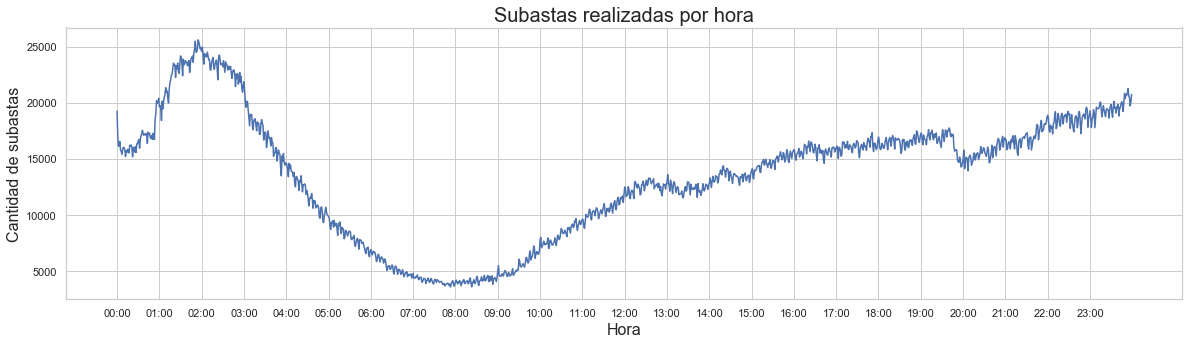

In [9]:
auctions["date"].dt.round("min").dt.time.value_counts().sort_index().plot(kind='line',figsize=(20,5), grid=True);
horas = [datetime.time(i) for i in range(24)]
plt.title("Subastas realizadas por hora", size=20);
plt.xticks(horas);
plt.xlabel("Hora", size=16);
plt.ylabel("Cantidad de subastas", size=16);

Podemos ver que al igual que en el gráfico de la cantidad de clicks por hora también se alcanza el pico entre la 1 y las 2 de la mañana, aunque, a diferencia del gráfico de clicks, la cantidad de subastas se mantiene más estable a lo largo del día como pasaba en el gráfico de instalaciones por hora.

## Events

<a id='link_19'></a>
### Cantidad de eventos por tipo de conexión

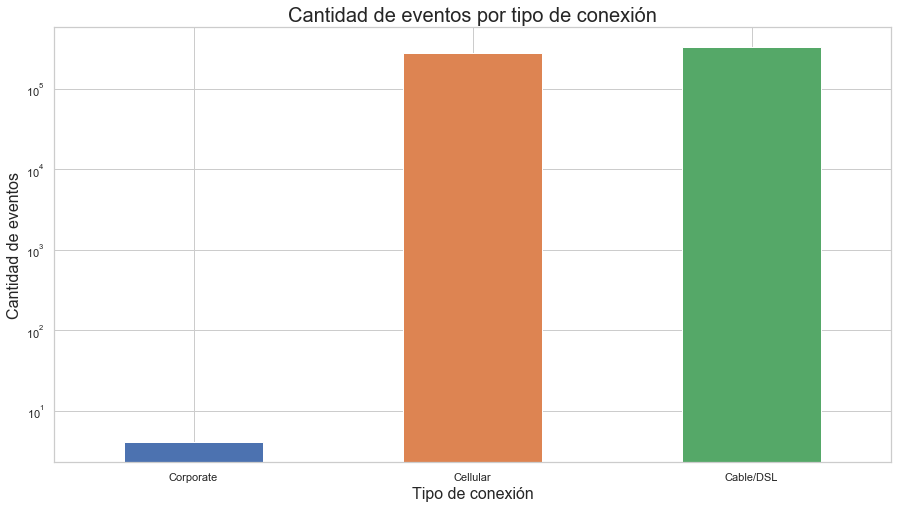

In [23]:
g = events['connection_type'].value_counts().sort_values().plot(figsize=(15,8),logy=True,kind='bar',rot=0);
g.set_xlabel("Tipo de conexión", fontsize=16);
g.set_ylabel("Cantidad de eventos", fontsize=16);
g.set_title('Cantidad de eventos por tipo de conexión',fontsize=20);

<a id='link_20'></a>
### Publicidades Google vs Apple

In [12]:
events['ref_type'].isnull().any()

False

In [13]:
events['ref_type'].value_counts()

1891515180541284343    1882743
1494519392962156891     611680
Name: ref_type, dtype: int64

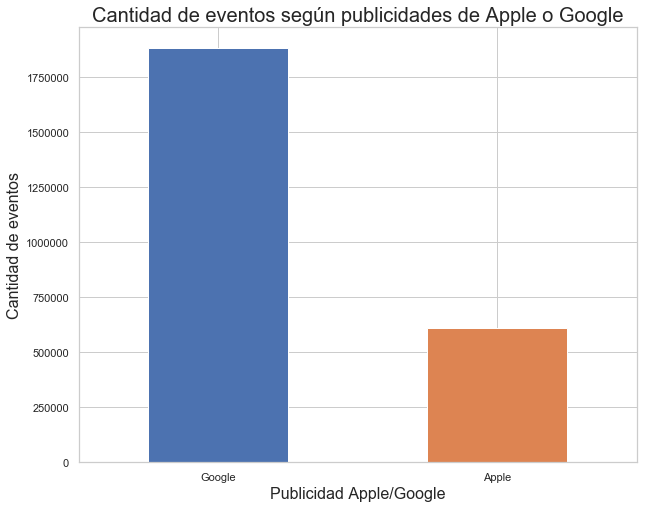

In [22]:
events['ref_type'].value_counts().plot(figsize=(10,8),kind='bar',rot=0)

plt.title('Cantidad de eventos según publicidades de Apple o Google', size=20)
plt.xlabel('Publicidad Apple/Google', size=16)
plt.ylabel('Cantidad de eventos', size=16);

<a id='link_21'></a>
### Cantidad de eventos según la versión del sistema operativo

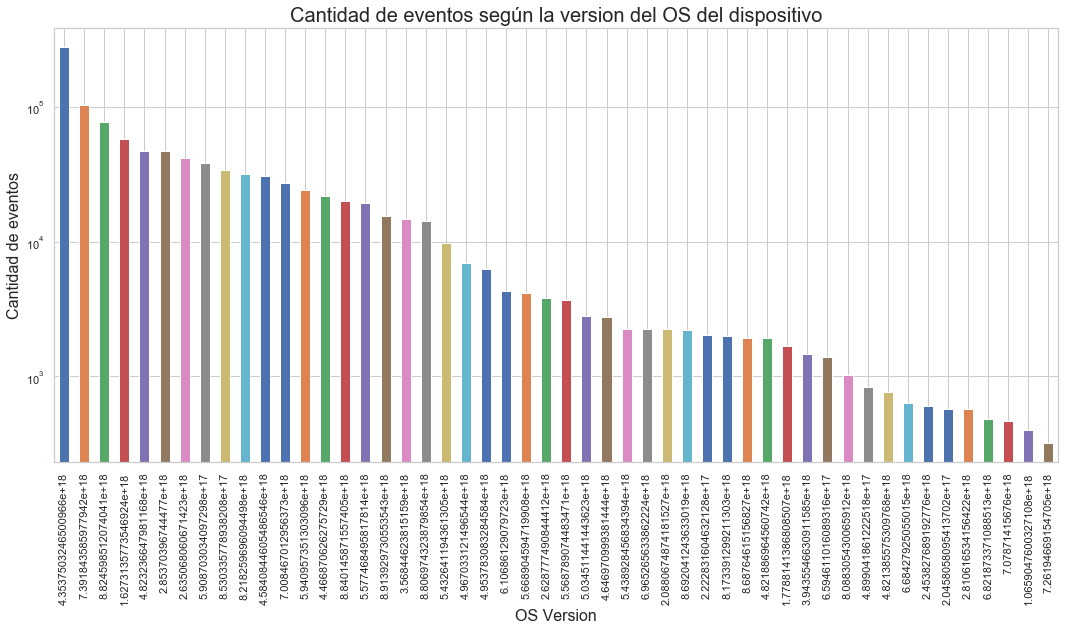

In [15]:
events['device_os_version'].value_counts().head(50).plot(kind='bar',logy=True,figsize=(18,8))

plt.title('Cantidad de eventos según la version del OS del dispositivo',size=20)
plt.xlabel('OS Version',size=16)
plt.ylabel('Cantidad de eventos',size=16);

<a id='link_22'></a>
### Análisis de los horarios en eventos

In [29]:
events['Week_day'] = events['date'].dt.day_name().astype('category')
events['Year'] = events['date'].dt.year.astype('category')
events['Month'] = events['date'].dt.month.astype('category')
events['Hour'] = events['date'].dt.hour.astype('int8')

In [18]:
events['Year'].value_counts()

2019    2494423
Name: Year, dtype: int64

En el set de datos dado solo se tiene información del 2019.

In [19]:
events['Month'].value_counts()

3    2494423
Name: Month, dtype: int64

En el set de datos dado solo se tiene información del mes de Marzo.

In [20]:
df = events[['Week_day','Hour']].groupby(['Week_day','Hour']).size().reset_index(name='cantidad')\
    .set_index('Week_day')

df = df.pivot_table(values='cantidad', index=df.index, columns='Hour').fillna(value=0)

In [21]:
df.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Week_day,,,,,,,,,,,,,,,,,,,,,
Friday,27825,20142,16088,11611,6286,4547,2945,2230,2106,3398,...,11625,15012,15810,15707,14413,13757,15279,15491,16681,20407
Monday,18805,17971,14027,10187,7767,4058,3548,2836,2780,3866,...,10642,13347,17992,15145,13704,12852,14009,15775,16044,17865
Saturday,21582,18546,15396,12692,9531,6824,4067,3437,3864,4232,...,10831,14190,16619,17103,15851,14353,14978,15632,17245,19641
Sunday,22008,18819,16854,12929,10394,8166,6868,4674,4129,3889,...,11392,13005,14781,16018,16255,16025,14702,17495,18194,20275
Thursday,18010,15233,14445,11240,6789,4128,2593,1800,2566,3240,...,10745,13255,14379,12971,11740,13919,14714,14433,15976,21370


Ordenamos por día de la semana

In [24]:
df = pd.merge(days, df, on='Week_day', how='left')
df = df.set_index('Week_day')

In [25]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Week_day,,,,,,,,,,,,,,,,,,,,,
Monday,18805,17971,14027,10187,7767,4058,3548,2836,2780,3866,...,10642,13347,17992,15145,13704,12852,14009,15775,16044,17865
Tuesday,35015,33823,28432,21903,14189,9217,5842,4180,4101,6221,...,22335,29365,29984,29761,28090,28859,29926,35432,37017,38296
Wednesday,37827,34754,28649,21907,14071,10021,6432,4466,4530,8053,...,23882,36018,30834,28463,27003,27090,30151,28437,33117,37860
Thursday,18010,15233,14445,11240,6789,4128,2593,1800,2566,3240,...,10745,13255,14379,12971,11740,13919,14714,14433,15976,21370
Friday,27825,20142,16088,11611,6286,4547,2945,2230,2106,3398,...,11625,15012,15810,15707,14413,13757,15279,15491,16681,20407


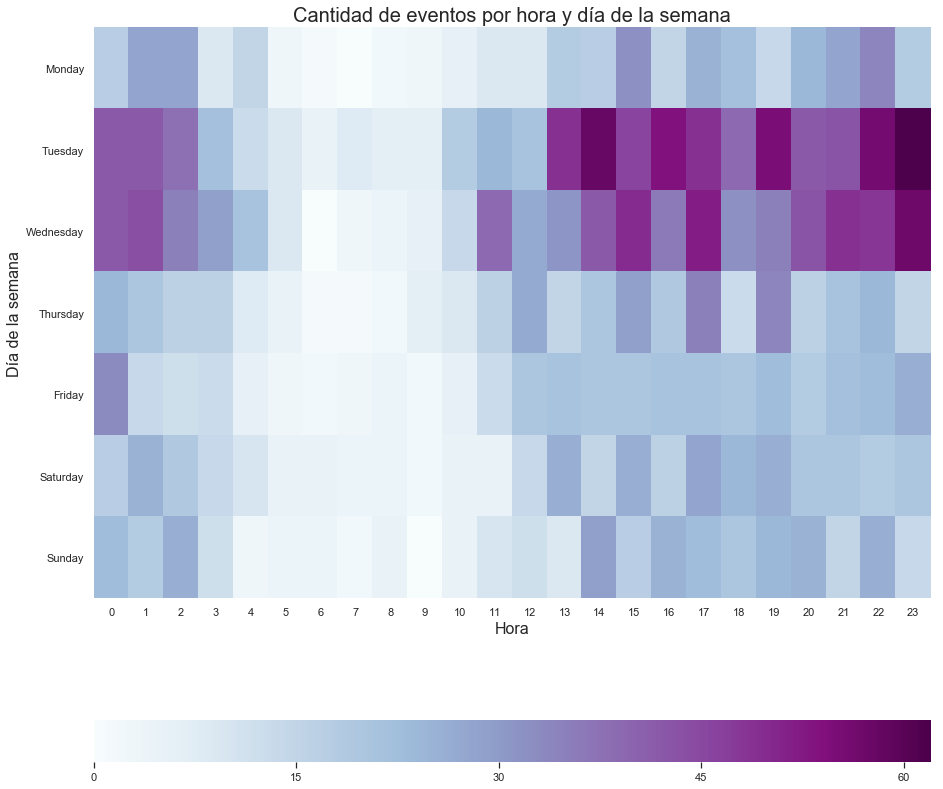

In [34]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df,ax=ax,cmap="BuPu",cbar_kws={"orientation": "horizontal"});
plt.yticks(rotation=0);
plt.xlabel('Hora',size=16);
plt.ylabel('Día de la semana',size=16);
plt.title('Cantidad de eventos por hora y día de la semana',size=20);

In [35]:
del events['Year']
del events['Month']

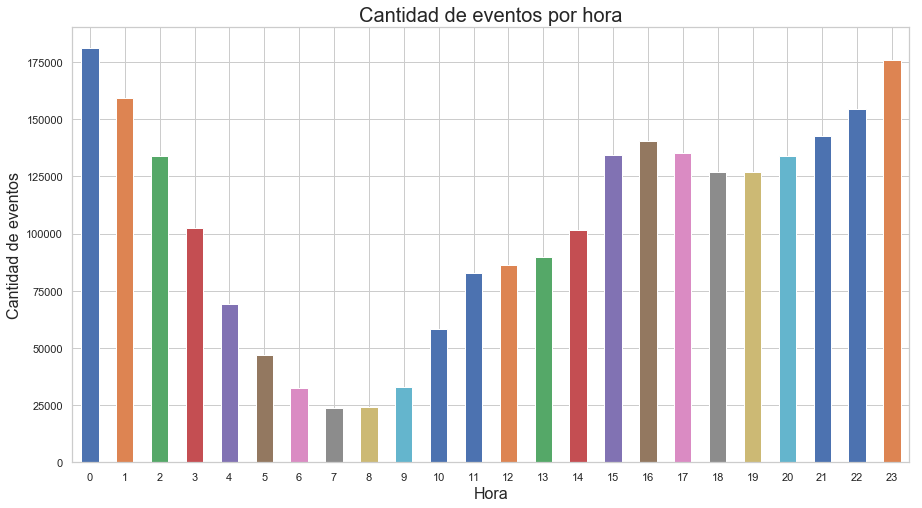

In [36]:
events['Hour'].value_counts().sort_index().plot(figsize=(15,8),kind='bar',rot=0)

plt.title('Cantidad de eventos por hora',size=20);
plt.xlabel('Hora',size=16);
plt.ylabel('Cantidad de eventos',size=16);

Vemos que los gráficos son <b>muy similares</b> a los que nos dieron cuando se analizó el horario para las instalaciones. <b>Esto puede deberse a que las instalaciones se registran como un evento.</b>

<a id='link_23'></a>
### Cuantos de estos eventos se le atribuyen a Jampp

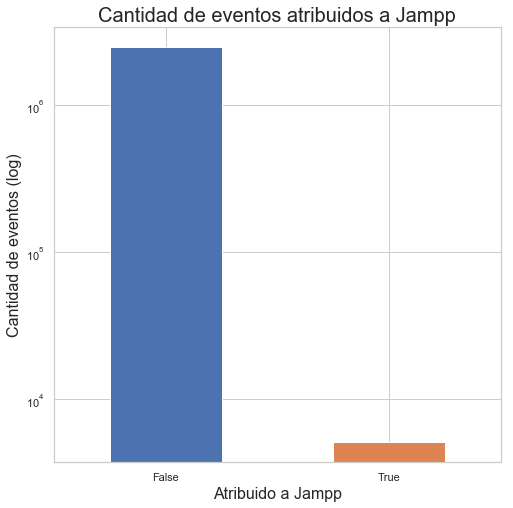

In [39]:
events['attributed'].value_counts().plot(figsize=(8,8),kind='bar',rot=0,logy=True)

plt.title('Cantidad de eventos atribuidos a Jampp',size=20)
plt.ylabel('Cantidad de eventos (log)',size=16)
plt.xlabel('Atribuido a Jampp',size=16);

<a id='link_24'></a>
### Ciudades con más eventos

In [64]:
events['device_city'].isnull().sum()

1879725

In [65]:
events['device_city'].dtypes

dtype('float64')

El valor -1 representa a todos los registros que no tienen información de la ciudad.

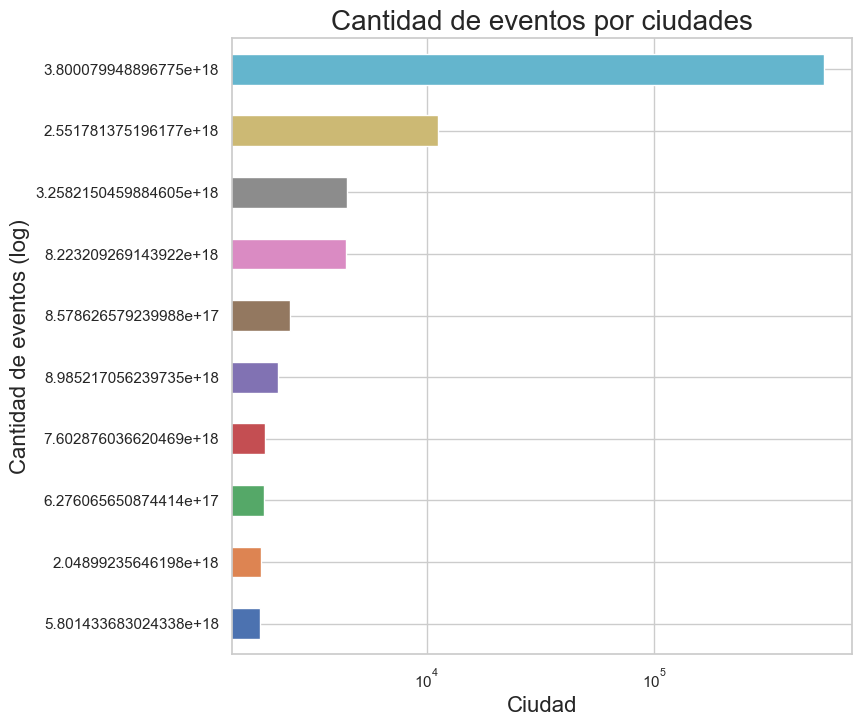

In [29]:
events['device_city'].value_counts().head(10).T.sort_values(ascending=True)\
    .plot(figsize=(8,8),kind='barh',rot=0,logx=True)
    
plt.title('Cantidad de eventos por ciudades',size=20)
plt.ylabel('Cantidad de eventos (log)',size=16)
plt.xlabel('Ciudad',size=16);

<a id='link_25'></a>
### Comparación ciudades con mas eventos

El siguiente análisis se hace sobre las dos ciudades(string hasheado) con mas cantidad de eventos
- 3.800080
- 2.551781

In [26]:
ciudades = events.groupby('device_city').size().reset_index(name='cantidad')\
    .sort_values(by='cantidad',ascending=False).head(3).reset_index()['device_city']

ciudad_1 = ciudades[1]
ciudad_2 = ciudades[2]

In [32]:
df = events.loc[events['device_city'].isin([ciudad_1,ciudad_2])]

In [74]:
df1 = df.loc[df['device_city']==ciudad_1]\
    .groupby(['Week_day','Hour']).size().reset_index(name='cantidad').set_index('Week_day')

df2 = df.loc[df['device_city']==ciudad_2]\
    .groupby(['Week_day','Hour']).size().reset_index(name='cantidad').set_index('Week_day')

df1 = df1.pivot_table(values='cantidad', index=df1.index, columns='Hour').fillna(value=0)
df2 = df2.pivot_table(values='cantidad', index=df2.index, columns='Hour').fillna(value=0)

df1 = pd.merge(days, df1, on='Week_day', how='left')
df1 = df1.set_index('Week_day')
df2 = pd.merge(days, df2, on='Week_day', how='left')
df2 = df2.set_index('Week_day')

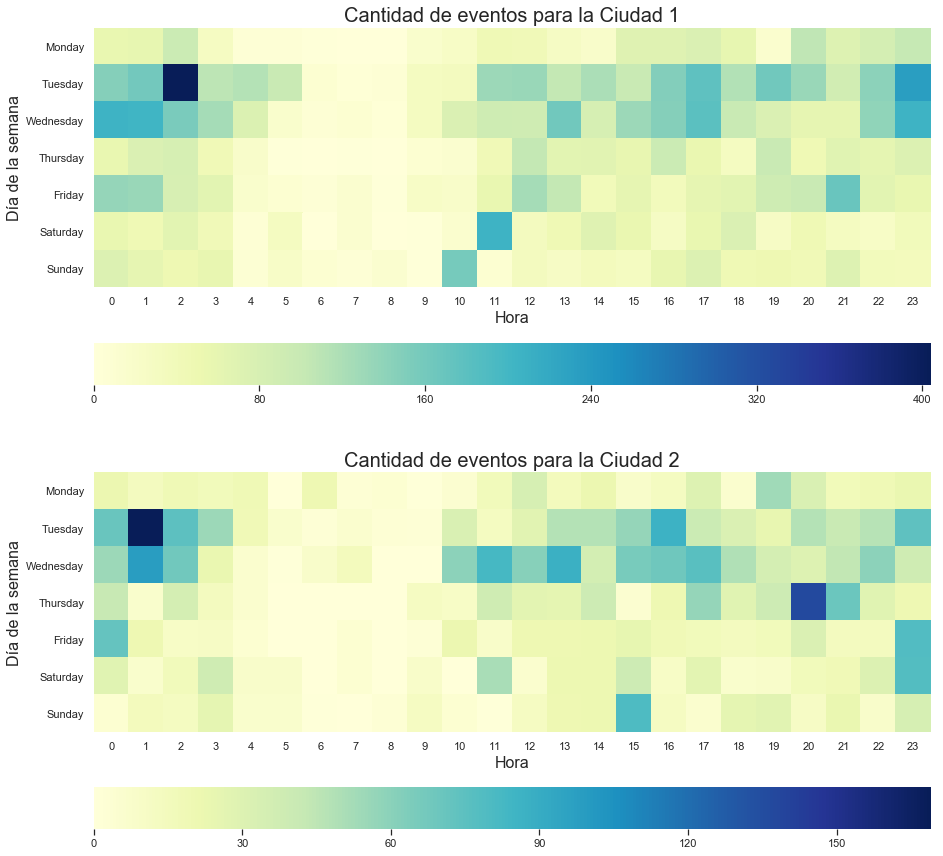

In [75]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
sns.heatmap(df1,ax=ax1,cmap="YlGnBu",cbar_kws={"orientation": "horizontal"});
sns.heatmap(df2,ax=ax2,cmap="YlGnBu",cbar_kws={"orientation": "horizontal"});
plt.yticks(rotation=0);
ax1.set_xlabel('Hora',fontsize=16)
ax2.set_xlabel('Hora',fontsize=16)
ax1.set_ylabel('Día de la semana',fontsize=16)
ax2.set_ylabel('Día de la semana',fontsize=16)
ax1.set_title('Cantidad de eventos para la Ciudad 1',fontsize=20)
ax2.set_title('Cantidad de eventos para la Ciudad 2',fontsize=20);

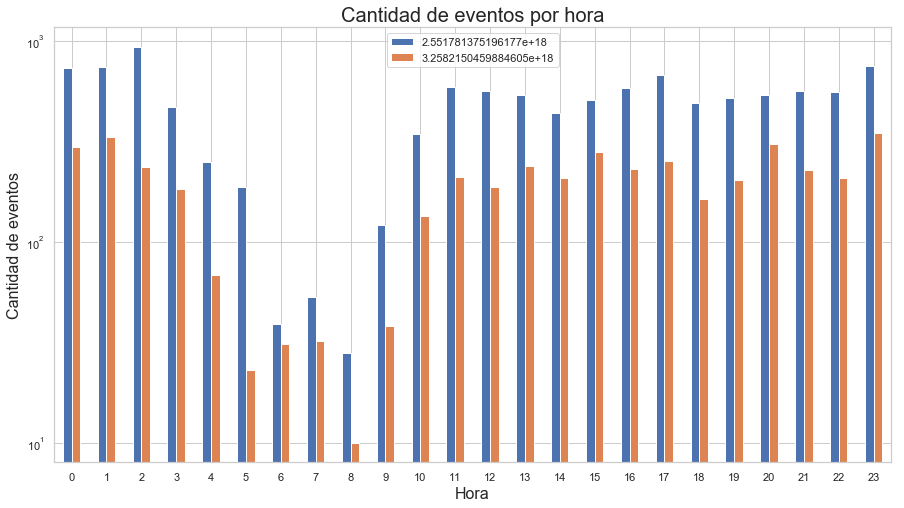

In [33]:
df = df.groupby(['device_city','Hour']).size().reset_index(name='cantidad').set_index(['device_city','Hour'])\
    .unstack()

df.columns = df.columns.droplevel()
ax =df.T.plot(figsize=(15,8),kind='bar'\
    ,rot=0,logy=True)

plt.title('Cantidad de eventos por hora',size=20)
plt.xlabel('Hora',size=16)
plt.ylabel('Cantidad de eventos',size=16)

patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best');

<a id='link_26'></a>
### Dispositivos con más eventos

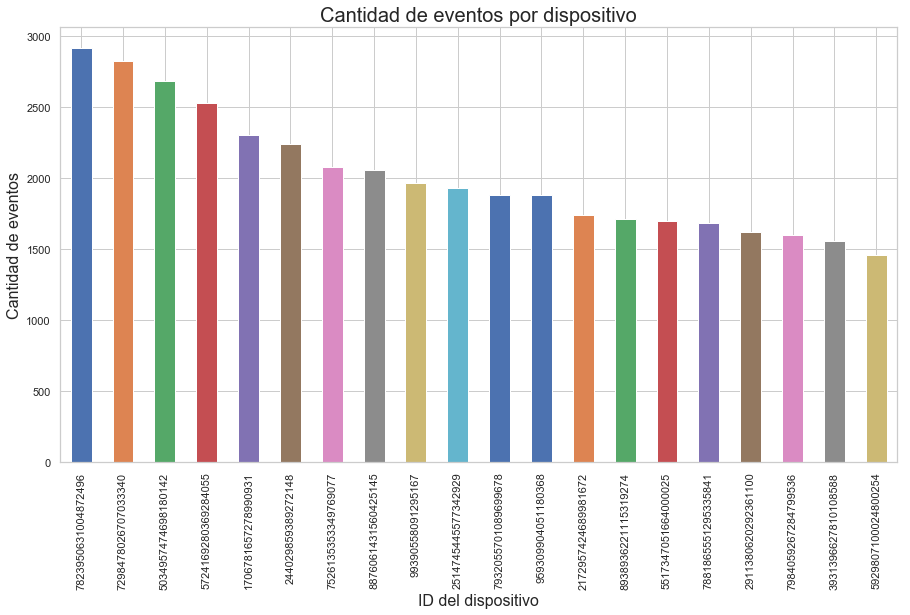

In [34]:
events['ref_hash'].value_counts().sort_values(ascending=False).head(20).plot(figsize=(15,8),kind='bar',rot=90);

plt.xlabel('ID del dispositivo',fontsize=16)
plt.title('Cantidad de eventos por dispositivo',fontsize=20)
plt.ylabel('Cantidad de eventos',fontsize=16);

<a id='link_27'></a>
### Cantidad de dispositivos por ciudad

In [39]:
df = events[['device_city','ref_hash']].groupby(['device_city','ref_hash']).size()\
    .reset_index(name='cantidad')

In [40]:
df.head()

,device_city,ref_hash,cantidad
0,4.355428e+16,2372589304268831616,1
1,4.355428e+16,4212450976477515531,2
2,4.355428e+16,6924661621177203078,2
3,6.474546e+16,4490298771574500194,1
4,1.189543e+17,37851696084558535,8


In [41]:
df['cantidad']=1

In [42]:
df.head()

,device_city,ref_hash,cantidad
0,4.355428e+16,2372589304268831616,1
1,4.355428e+16,4212450976477515531,1
2,4.355428e+16,6924661621177203078,1
3,6.474546e+16,4490298771574500194,1
4,1.189543e+17,37851696084558535,1


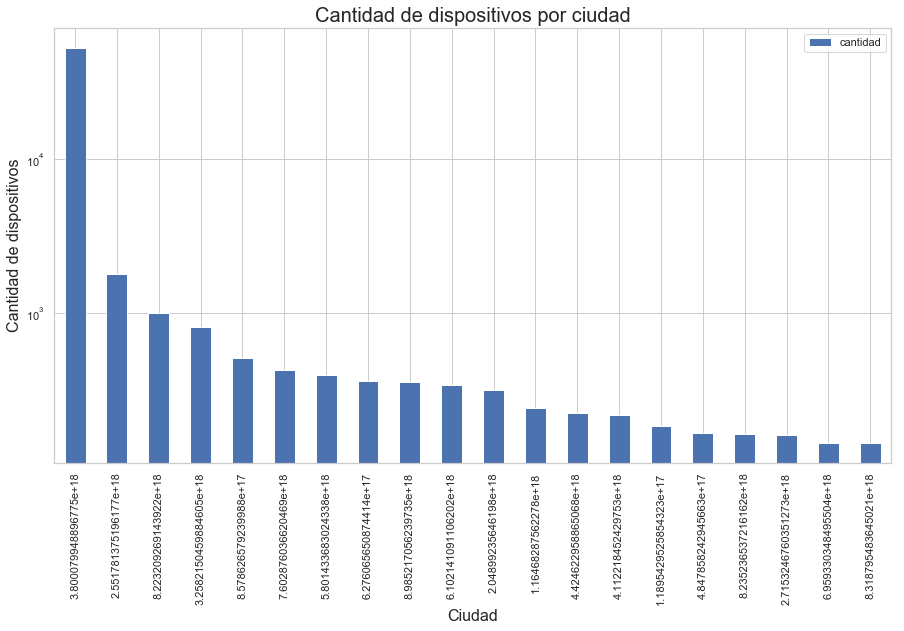

In [43]:
df= df[['device_city','cantidad']].groupby('device_city').sum().sort_values(by='cantidad',ascending=False)

df.head(20).plot(figsize=(15,8),kind='bar',rot=90,logy=True);

plt.xlabel('Ciudad',fontsize=16)
plt.title('Cantidad de dispositivos por ciudad',fontsize=20)
plt.ylabel('Cantidad de dispositivos',fontsize=16);    

In [83]:
df.head(2)

,cantidad
device_city,
3.800080e+18,52845
2.551781e+18,1808


Podemos observar que estas dos ciudades con mas dispositivos son las mismas que poseen más eventos registrados.

<a id='link_28'></a>
### Sistema Operativo de los dipositivos

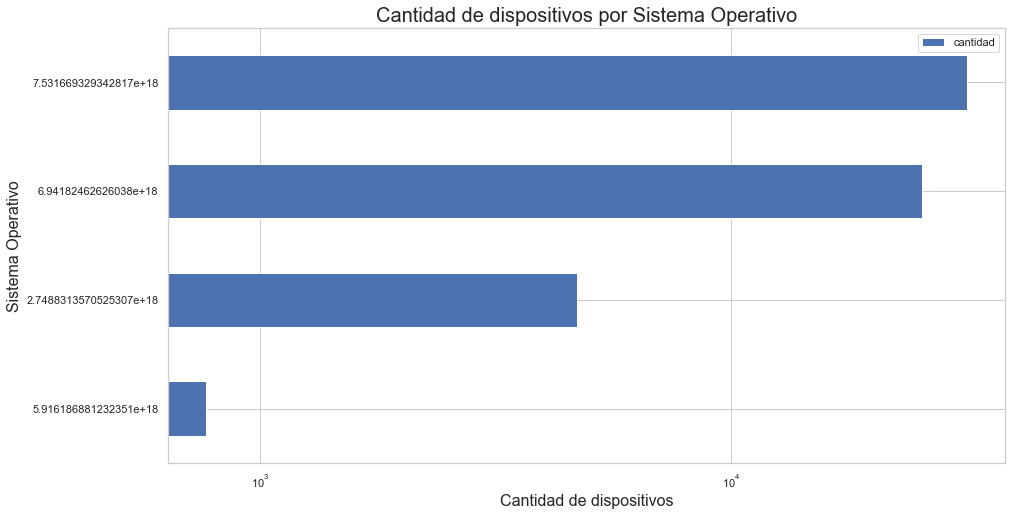

In [44]:
df = events[['ref_hash','device_os']].groupby(['ref_hash','device_os']).size()\
    .reset_index(name='cantidad')

df['cantidad']=1
    
df= df[['device_os','cantidad']].groupby('device_os').sum().sort_values(by='cantidad',ascending=False)

df.head(20).sort_values(by='cantidad',ascending=True).plot(figsize=(15,8),kind='barh',rot=0,logx=True);

plt.ylabel('Sistema Operativo',fontsize=16)
plt.title('Cantidad de dispositivos por Sistema Operativo',fontsize=20)
plt.xlabel('Cantidad de dispositivos',fontsize=16); 

Analizamos la relación de los datasets events e installs

In [5]:
events_installs = pd.merge(events, installs, how='inner',left_on=['date', 'ref_hash'], right_on=['created', 'ref_hash'], suffixes=('_e', '_i'))

In [6]:
events_installs.shape

(859, 36)

Haciendo un join por fecha y ref_hash, vemos que hay 859 registros. Esto nos hace pensar que las instalaciones podrian estar representadas como eventos.

In [216]:
events_installs['kind_e'].value_counts()

5.500848e+18    423
9.977660e+17    212
7.310429e+17     70
6.081165e+18     36
6.794944e+18     33
8.820572e+18     21
3.872962e+18     17
7.005327e+18     13
9.018386e+18      6
6.169667e+18      6
3.811962e+18      5
3.884860e+18      4
9.104795e+18      3
4.174879e+18      3
1.896484e+18      2
4.647949e+18      1
4.865543e+18      1
3.316831e+17      1
3.649875e+18      1
7.186415e+18      1
Name: kind_e, dtype: int64

In [217]:
events_installs['kind_i'].value_counts()

af_app_opened                 423
app_open                      212
EVENT_Homepage                 70
open                           36
EVENT_OPEN_APP                 33
Open                           21
login_success                  17
account_summary_first_step     13
EVENT_HOMEPAGE                  6
EVENT_LISTINGVIEW_FLIGHT        6
deeplink                        5
reattribution                   4
registration                    3
payment method add              3
journey first drop off          2
journey drop off                1
journey reserved                1
EVENT_PROMO                     1
install                         1
af_list_view                    1
Name: kind_i, dtype: int64

Ademas viendo los tipos de eventos podria decirse que podrian ser considerados conversiones. El *kind* de los eventos esta hasheado, mientras que el de los installs no. Contando los valores podemos ver una relacion entre cada uno. Por lo que tiene todo el sentido decir que las instalaciones pueden ser a su vez eventos.

<a id='link_29'></a>
### Eventos previos a instalaciones

In [3]:
df = pd.merge(installs[['created','ref_hash']],events[['date','ref_hash']],on='ref_hash',how='left')

In [4]:
df.head()

,created,ref_hash,date
0,2019-03-13 01:43:33.445,8464844987297247076,2019-03-13 01:43:35.415
1,2019-03-13 04:58:35.078,3250564871270161533,2019-03-13 04:58:34.835
2,2019-03-13 04:20:57.666,7953318831018100268,2019-03-13 04:20:57.666
3,2019-03-13 04:20:57.698,7953318831018100268,2019-03-13 04:20:57.666
4,2019-03-10 22:24:56.684,8355110941557237501,2019-03-10 22:24:56.684


In [5]:
df['date'].isnull().sum()

301

In [6]:
df = df.dropna()

In [7]:
df = df.loc[df['created']>=df['date']]

In [8]:
df['created_before'] = df.apply(lambda x: len(df.loc[(df['ref_hash']==x['ref_hash'])&\
                                            (df['created']==x['created'])&\
                                           (df['date']<x['date'])]), axis=1)

In [9]:
df = df.loc[df['created_before']!=0]

In [10]:
df['day_auction'] = df['created'].dt.day

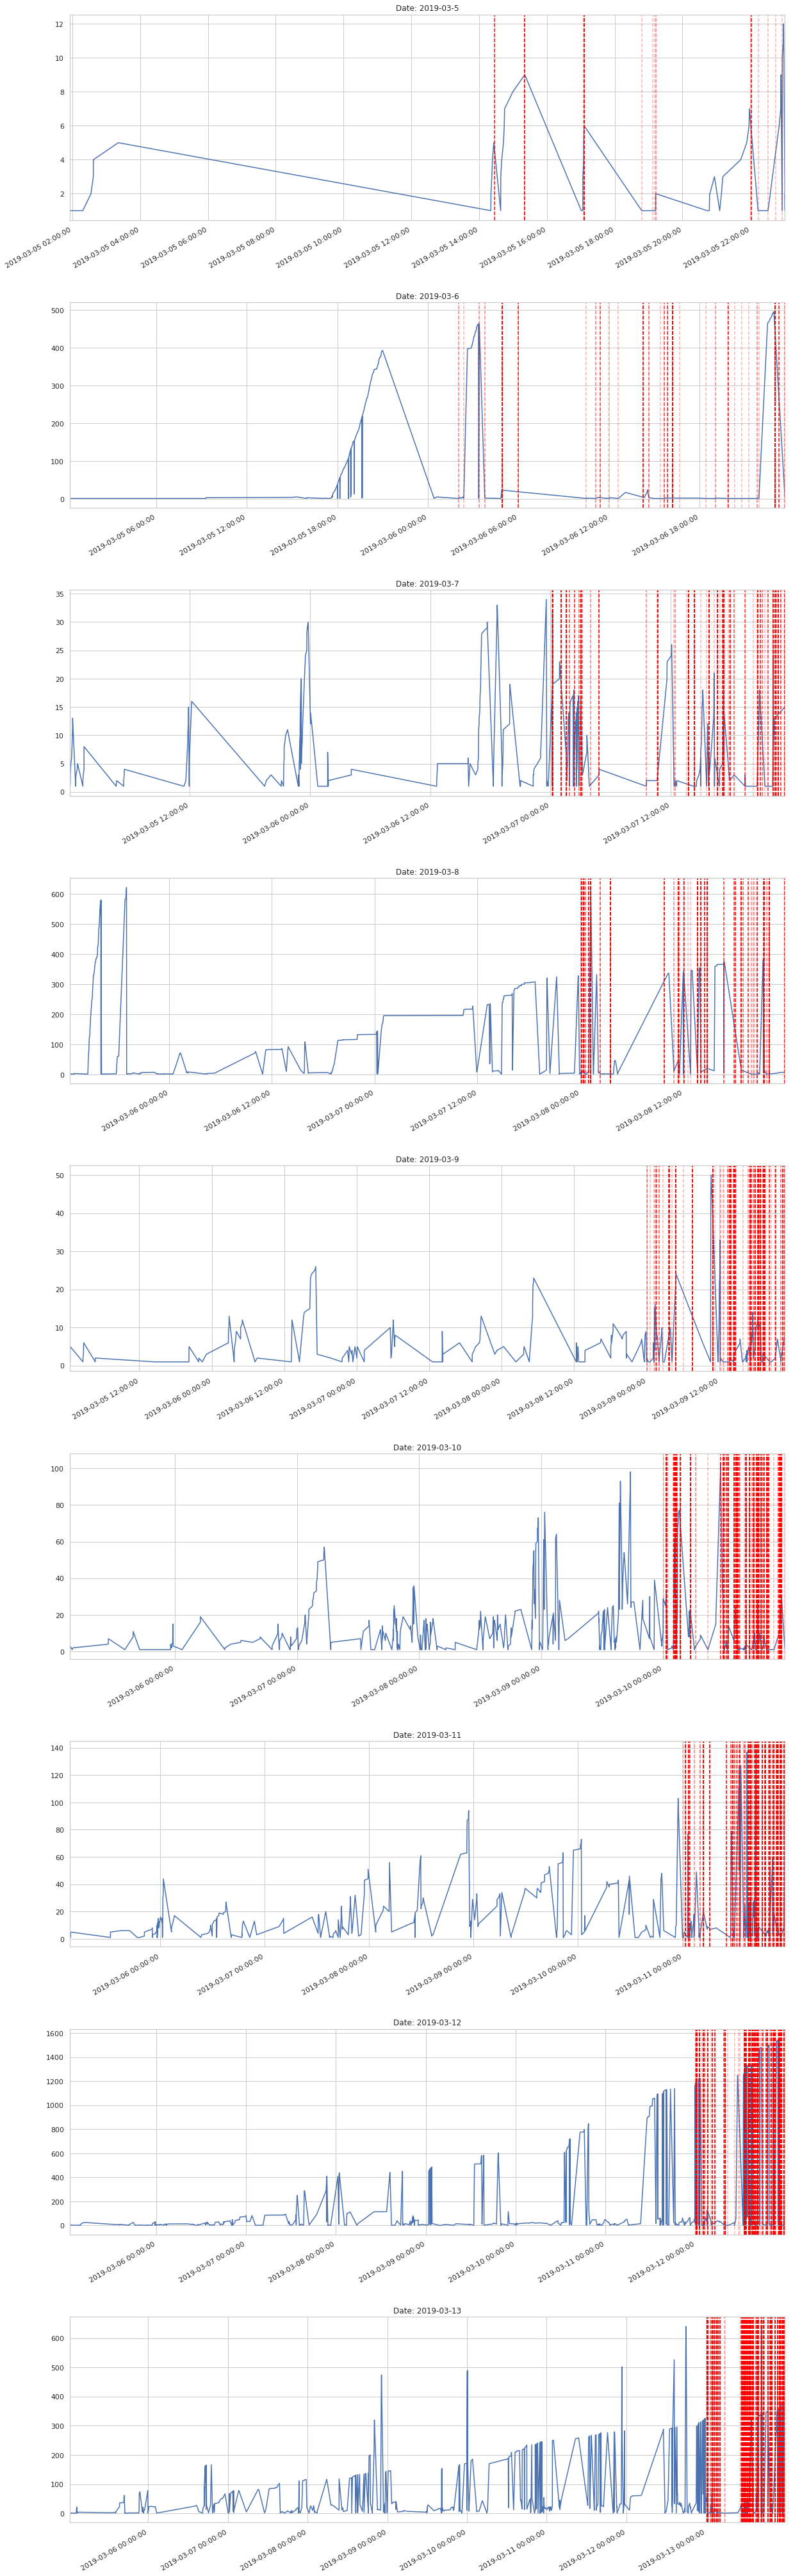

In [11]:
fig, axes = plt.subplots(nrows=9, ncols=1)
fig.subplots_adjust(hspace=0.4)
spfvL = df['day_auction'].sort_values(ascending=True).unique()
for j, i in enumerate(spfvL):
    aux =df.loc[df['day_auction']==i] 
    aux.sort_values(by='date',inplace=True)
    aux = aux.set_index('date')
    ax = aux['created_before'].plot(figsize=(20,80),ax = axes.flat[j])
    ax.set_title("Date: 2019-03-"+str(i))
    ax.set_xlabel('')
    xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
    ax.xaxis.set_major_formatter(xfmt)
    for line in range(0,aux.shape[0]):   
        x_line_annotation = aux['created'][line]
        ax.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.3,color='red')

#### Visualizo ahora el top 2 de dispositivos que instaló más. 
Visualizacion puntual de los dispositivos

In [12]:
lista = installs.groupby('ref_hash').size().reset_index(name='cantidad')\
    .sort_values(by='cantidad',ascending=False).head(2).reset_index()['ref_hash']

In [13]:
df_2 = df.loc[df['ref_hash']==lista[0]]

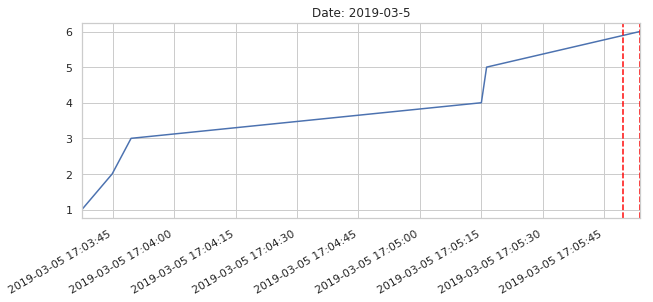

In [14]:
fig, axes = plt.subplots(nrows=len(df_2['day_auction'].sort_values(ascending=True).unique()), ncols=1)
fig.subplots_adjust(hspace=0.4)
spfvL = df_2['day_auction'].sort_values(ascending=True).unique()
for j, i in enumerate(spfvL):
    aux =df_2.loc[df['day_auction']==i] 
    aux.sort_values(by='date',inplace=True)
    aux = aux.set_index('date')
    ax = aux['created_before'].plot(figsize=(10,4))
    ax.set_title("Date: 2019-03-"+str(i))
    ax.set_xlabel('')
    xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
    ax.xaxis.set_major_formatter(xfmt)
    for line in range(0,aux.shape[0]):   
        x_line_annotation = aux['created'][line]
        ax.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.3,color='red')

In [15]:
df_2 = df.loc[df['ref_hash']==lista[1]]

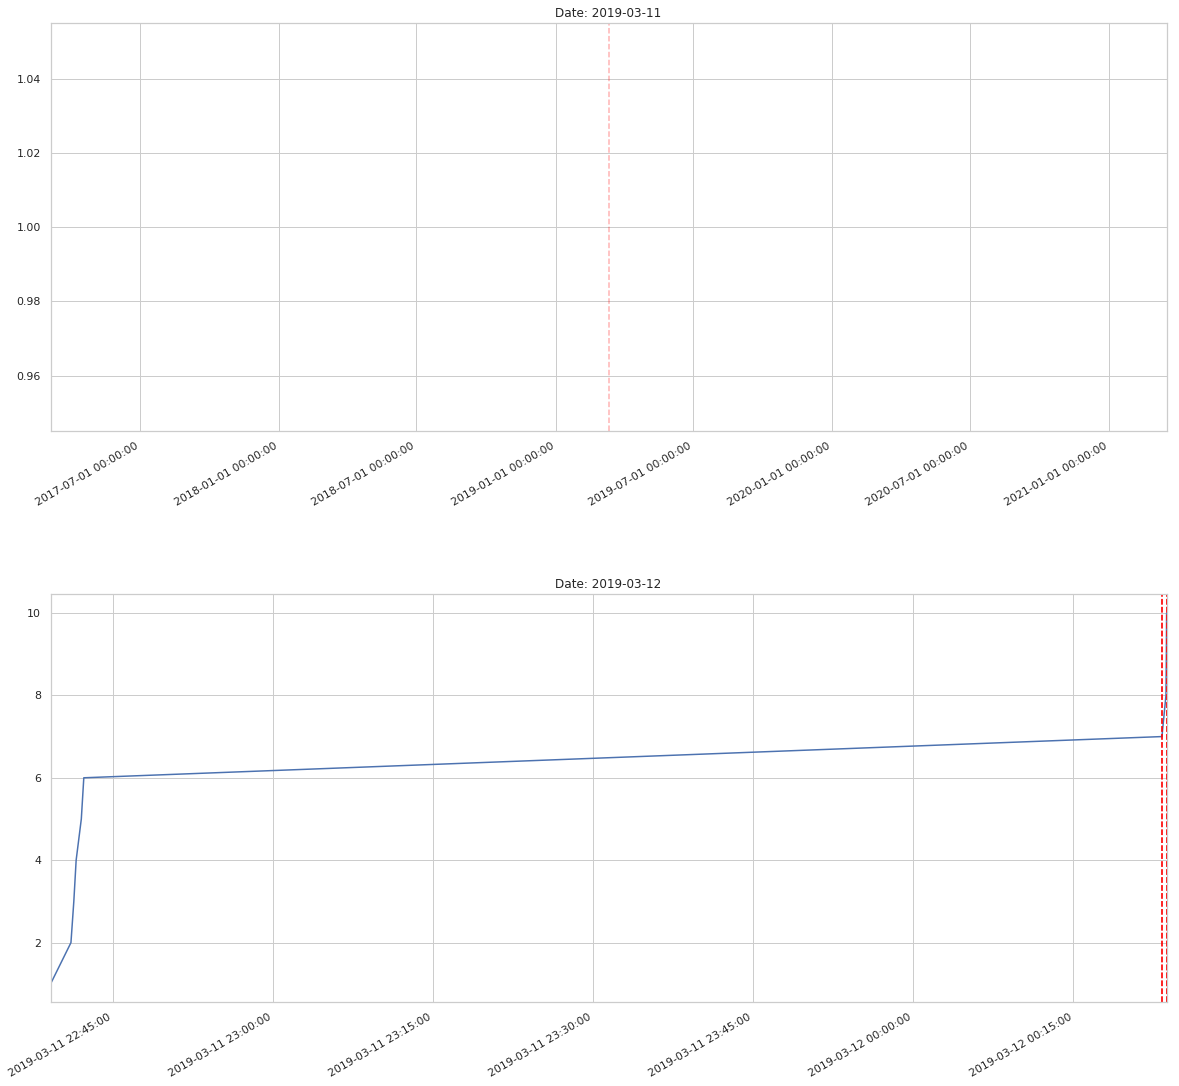

In [16]:
fig, axes = plt.subplots(nrows=len(df_2['day_auction'].sort_values(ascending=True).unique()), ncols=1)
fig.subplots_adjust(hspace=0.4)
spfvL = df_2['day_auction'].sort_values(ascending=True).unique()
for j, i in enumerate(spfvL):
    aux =df_2.loc[df['day_auction']==i] 
    aux.sort_values(by='date',inplace=True)
    aux = aux.set_index('date')
    ax = aux['created_before'].plot(figsize=(20,20),ax = axes.flat[j])
    ax.set_title("Date: 2019-03-"+str(i))
    ax.set_xlabel('')
    xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
    ax.xaxis.set_major_formatter(xfmt)
    for line in range(0,aux.shape[0]):   
        x_line_annotation = aux['created'][line]
        ax.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.3,color='red')

<a id='link_30'></a>
### Instalaciones y tipos de eventos

In [46]:
df = pd.merge(installs[['created','ref_hash','kind']],events[['date','ref_hash','kind']],
              on='ref_hash',how='left')

top10 = lista = installs.groupby('ref_hash').size().reset_index(name='cantidad')\
    .sort_values(by='cantidad',ascending=False).head(10).reset_index()['ref_hash']

df = df.loc[df['ref_hash'].isin(top10)]
df = df.groupby(['ref_hash','created','kind_x']).size().reset_index(name='cantidad')
df = df[['ref_hash','kind_x','cantidad']].set_index('ref_hash')
df = df.pivot_table(values='cantidad', index='kind_x', columns='ref_hash').fillna(value=0)

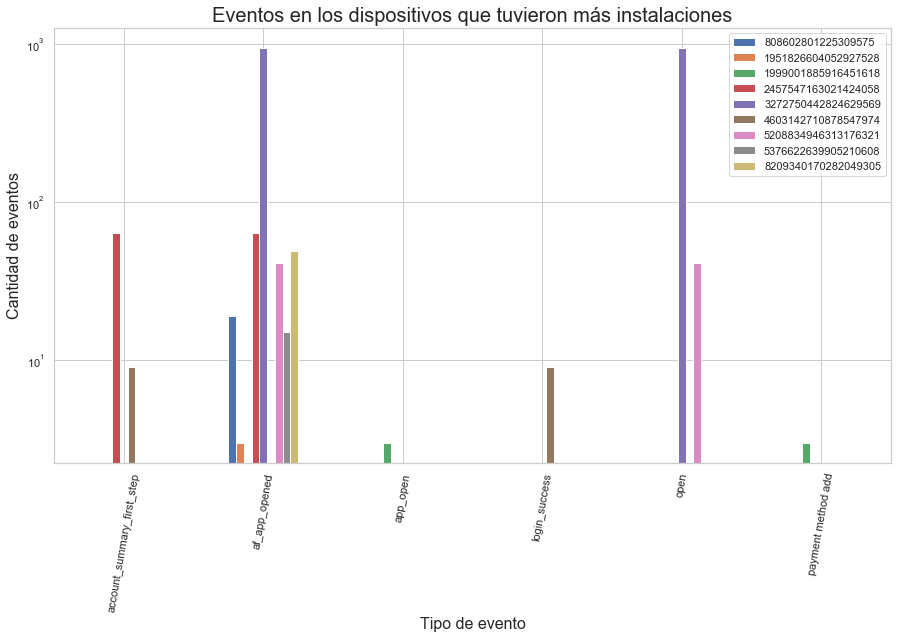

In [47]:
ax = df.plot(figsize=(15,8),kind='bar',rot=80,logy=True)

patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')
ax.set_title('Eventos en los dispositivos que tuvieron más instalaciones',fontsize=20)
ax.set_xlabel('Tipo de evento',fontsize=16)
ax.set_ylabel('Cantidad de eventos',fontsize=16);

<a id='link_31'></a>
### Sitios de donde se instalan

In [49]:
df = installs.loc[installs['session_user_agent'].isnull()==False]

In [50]:
df['session_user_agent'] = df.apply(lambda x: 'Mozilla' if 'Mozilla' in x['session_user_agent'] else x['session_user_agent'], axis=1)

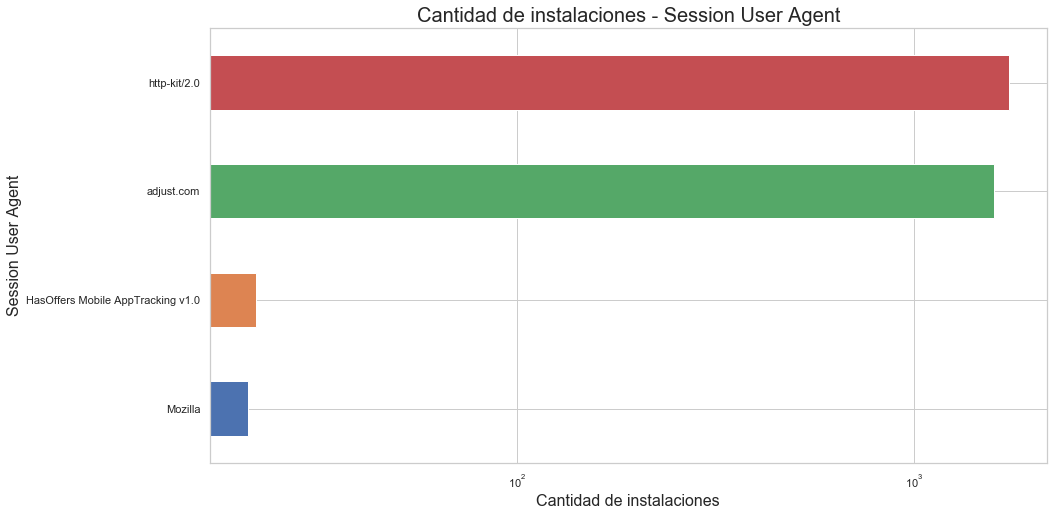

In [51]:
df['session_user_agent'].value_counts().sort_values(ascending=False).head(30)\
    .T.sort_values(ascending=True)\
    .plot(figsize=(15,8),kind='barh',rot=0,logx=True);

plt.xlabel('Cantidad de instalaciones',fontsize=16)
plt.ylabel('Session User Agent',fontsize=16)
plt.title('Cantidad de instalaciones - Session User Agent',fontsize=20);

<a id='link_32'></a>
### Sitio de instalacion - Sistema Operativo

In [52]:
df = installs.loc[installs['session_user_agent'].isnull()==False]
df['device_SO'] = df['session_user_agent']

In [53]:
df['device_SO'] = df.apply(lambda x: 'Mac OS X' if 'Mac OS X' in x['device_SO'] else x['device_SO'], axis=1)
df['device_SO'] = df.apply(lambda x: 'Android 6' if 'Android 6' in x['device_SO'] else x['device_SO'], axis=1)

In [54]:
df['device_SO'].value_counts()

http-kit/2.0                         1729
adjust.com                           1592
HasOffers Mobile AppTracking v1.0      22
Mac OS X                               20
Android 6                               1
Name: device_SO, dtype: int64

In [55]:
df['device_SO'] = df.apply(lambda x: 'Unknown' if x['device_SO'] not in ['Android 6','Mac OS X'] \
                           else x['device_SO'], axis=1)

In [56]:
df['device_SO'].value_counts()

Unknown      3343
Mac OS X       20
Android 6       1
Name: device_SO, dtype: int64

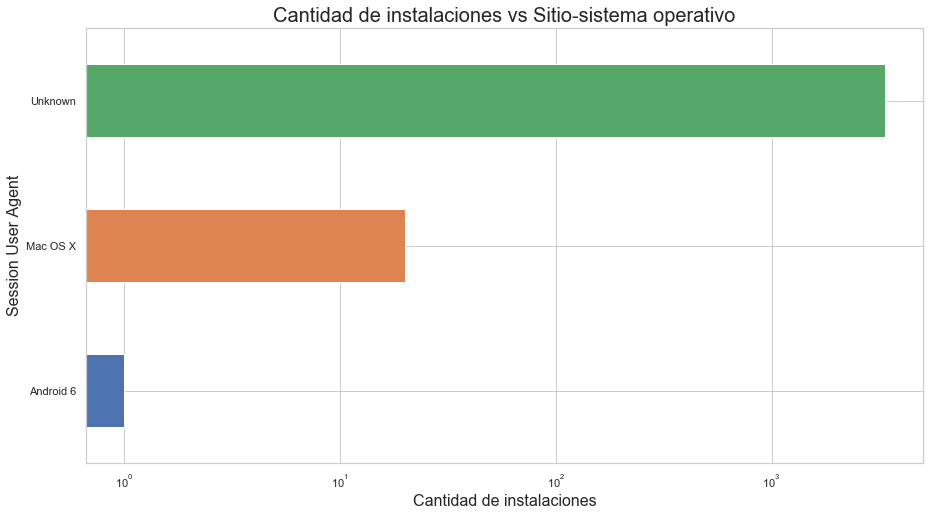

In [57]:
df['device_SO'].value_counts()\
    .T.sort_values(ascending=True)\
    .plot(figsize=(15,8),kind='barh',rot=0,logx=True);

plt.xlabel('Cantidad de instalaciones',fontsize=16)
plt.ylabel('Session User Agent',fontsize=16)
plt.title('Cantidad de instalaciones vs Sitio-sistema operativo',fontsize=20);

### Promedios de instalaciones por subasta

In [5]:
cant_installs = pd.DataFrame(installs['ref_hash'].value_counts())
cant_installs.rename(columns={'ref_hash':'Cantidad instalaciones'}, inplace=True)
cant_installs.reset_index(inplace=True)

cant_subastas = pd.DataFrame(auctions['device_id'].value_counts())
cant_subastas.rename(columns={'device_id':'Cantidad subastas'}, inplace=True)
cant_subastas.reset_index(inplace=True)

cant_subastas_installs = pd.merge(cant_subastas,cant_installs,how='outer',on='index').dropna().set_index('index')

In [6]:
cant_subastas_installs['promedio'] = (cant_subastas_installs['Cantidad instalaciones']*100 / cant_subastas_installs['Cantidad subastas'])

In [11]:
#Tomo solo aquellos dispositivos que estuvieron en mas de 50 subastas
cant_subastas_installs = cant_subastas_installs.loc[cant_subastas_installs['Cantidad subastas'] > 50]

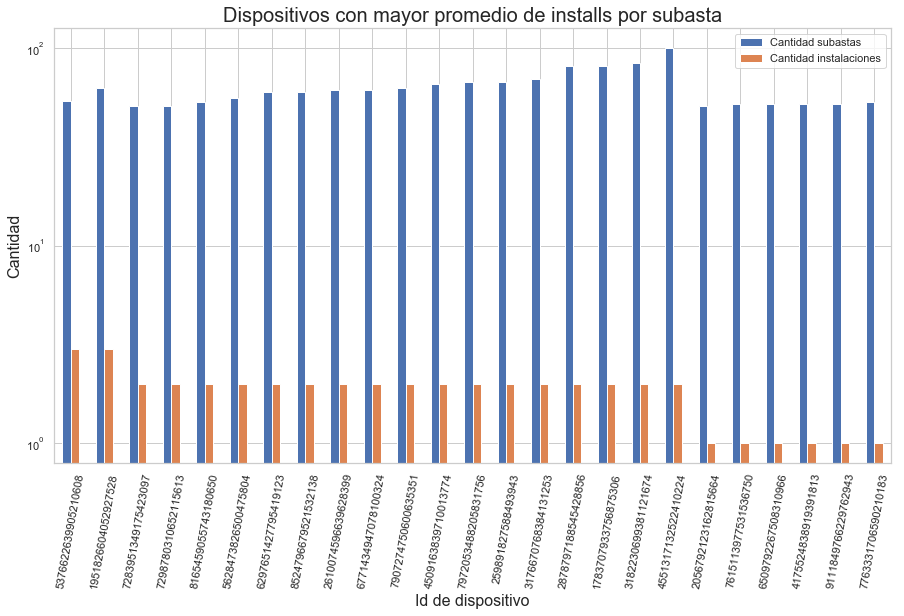

In [15]:
df = cant_subastas_installs.sort_values(by=['promedio'],ascending=False)[['Cantidad subastas','Cantidad instalaciones']]
df.head(25).plot(kind='bar', figsize=(15,8), logy=True, rot=80)
plt.xlabel('Id de dispositivo',size=16)
plt.ylabel('Cantidad',size=16)
plt.title('Dispositivos con mayor promedio de installs por subasta',size=20);

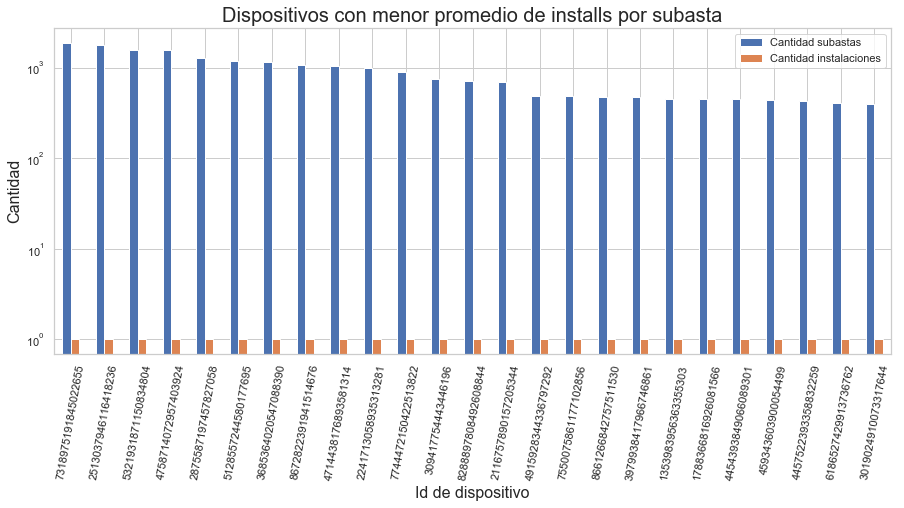

In [17]:
df = cant_subastas_installs.sort_values(by=['promedio'])[['Cantidad subastas','Cantidad instalaciones']]
df.head(25).plot(kind='bar', figsize=(15,6), logy=True, rot=80)
plt.xlabel('Id de dispositivo',size=16)
plt.ylabel('Cantidad',size=16)
plt.title('Dispositivos con menor promedio de installs por subasta',size=20);

### Promedios de clicks por subasta

In [20]:
cant_clicks = pd.DataFrame(clicks['ref_hash'].value_counts())
cant_clicks.rename(columns={'ref_hash':'Cantidad clicks'}, inplace=True)
cant_clicks.reset_index(inplace=True)

cant_subastas = pd.DataFrame(auctions['device_id'].value_counts())
cant_subastas.rename(columns={'device_id':'Cantidad subastas'}, inplace=True)
cant_subastas.reset_index(inplace=True)

cant_subastas_clicks = pd.merge(cant_subastas,cant_clicks,how='outer',on='index').set_index('index')
cant_subastas_clicks.head()

,Cantidad subastas,Cantidad clicks
index,,
633139769114048761,27762.0,10.0
7202276635029175071,23055.0,10.0
7298861376107043945,18188.0,12.0
6302840482782120473,16400.0,NaN
5376802567578262905,16367.0,9.0


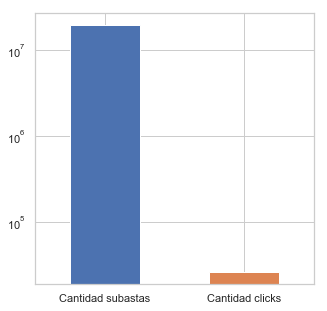

In [22]:
cant_subastas_clicks.sum().plot(kind='bar', figsize=(5,5), rot=0, logy=True);

In [23]:
cant_subastas_clicks['promedio'] = cant_subastas_clicks['Cantidad clicks']*100 / cant_subastas_clicks['Cantidad subastas']

In [48]:
#Tomo solo aquellos dispositivos que estuvieron en mas de 50 subastas
cant_subastas_clicks = cant_subastas_clicks.loc[cant_subastas_clicks['Cantidad subastas'] > 50]

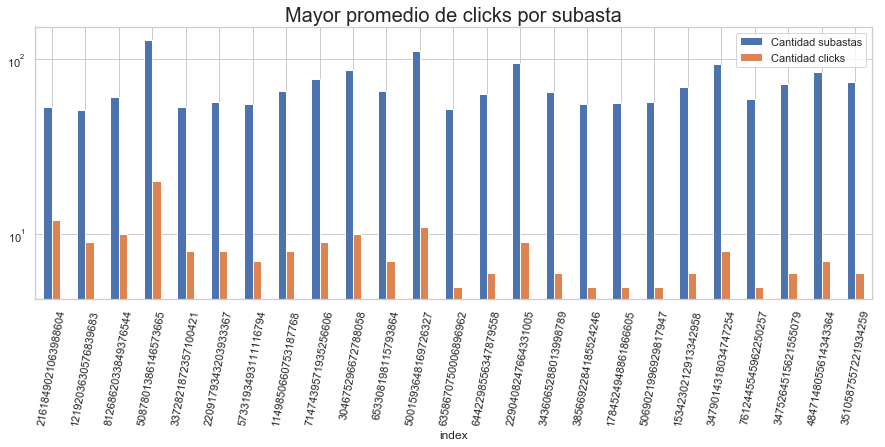

In [35]:
df = cant_subastas_clicks.sort_values(by='promedio', ascending=False)[['Cantidad subastas', 'Cantidad clicks']]
df.head(25).plot(kind='bar', figsize=(15,5), logy=True, rot=80);
plt.title('Mayor promedio de clicks por subasta',size=20);

<a id='link_33'></a>
### Tiempo transcurrido desde la ultima instalacion

In [29]:
df = installs.groupby('ref_hash').size().reset_index(name='cantidad')

In [30]:
df = df.loc[df['cantidad']>1]
del df['cantidad']

In [31]:
df = pd.merge(installs,df,on='ref_hash',how='inner')[['created','ref_hash']]\
    .sort_values(by='created',ascending=True)

In [32]:
def aux(column):
    c = column.sort_values(ascending=True).reset_index()['created']
    dias = 0
    cont = 0
    for i in range(0,len(c)):
        if i==len(c)-1:
            break
        dias = dias + abs((c[i]-c[i+1]).days)
        cont+=1
    return round(dias/cont)
df['dias_pasados']=df.groupby('ref_hash').transform(aux)

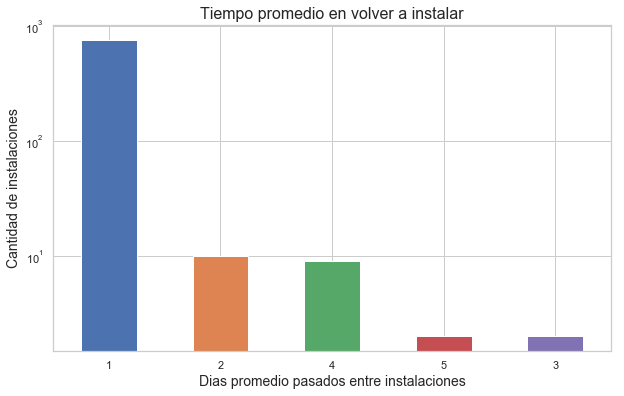

In [33]:
df['dias_pasados'].value_counts()\
    .plot(figsize=(10,6),kind='bar',rot=0,logy=True);

plt.xlabel('Dias promedio pasados entre instalaciones',fontsize=14)
plt.ylabel('Cantidad de instalaciones',fontsize=14)
plt.title('Tiempo promedio en volver a instalar',fontsize=16);

<a id='link_34'></a>
### Instalaciones, clicks, eventos y subastas por dispositivos

In [3]:
df = installs['ref_hash'].value_counts()

In [4]:
df = df.reset_index()

In [5]:
df.columns = ['ref_hash','Instalaciones']

In [6]:
df = pd.merge(df,clicks['ref_hash'].value_counts().reset_index(name='Clicks'),left_on='ref_hash',
        right_on='index',how='inner')
del df['index']
df = pd.merge(df,events['ref_hash'].value_counts().reset_index(name='Eventos'),left_on='ref_hash',
        right_on='index',how='inner')
del df['index']
df = pd.merge(df,auctions['device_id'].value_counts().reset_index(name='Subastas'),left_on='ref_hash',
        right_on='index',how='inner')
del df['index']

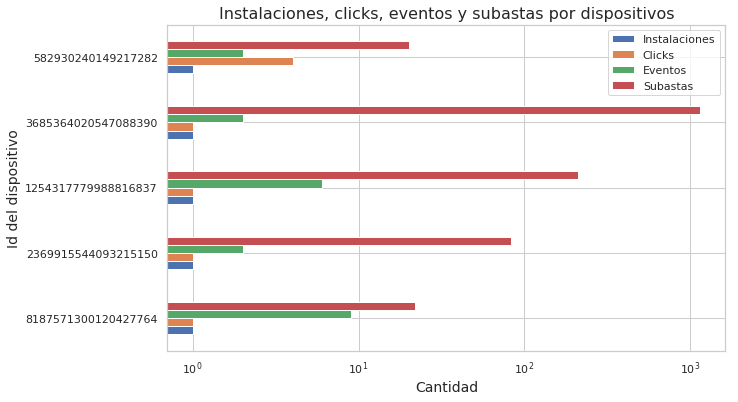

In [7]:
df.set_index('ref_hash').sort_values(by=['Instalaciones','Clicks','Subastas','Eventos'],
               ascending=True)\
     .plot(figsize=(10,6),kind='barh',rot=0,logx=True);

plt.xlabel('Cantidad',fontsize=14)
plt.ylabel('Id del dispositivo',fontsize=14)
plt.title('Instalaciones, clicks, eventos y subastas por dispositivos',fontsize=16);